### House Prices project. Road to 5%

In this project I will try to use my ds/ml skills to solve the famous regression task. There will be complete pipeline of data preprocessing, feature engineering and modeling. We will cover both simple classical methods (linear regression, random forest) and modern approaches for solving this kind of problems (modern boosting algs and neural networks)

### Importing

In [78]:
# core data-tules
import pandas as pd
import numpy as np
# stats tules
from scipy import stats
from statsmodels.regression import linear_model
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# compare models
from pycaret import regression
# hyperparametrs tuning
import optuna 
# ML-tules
from missingpy import MissForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest
# ML-models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet, BayesianRidge, OrthogonalMatchingPursuit
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
# DL solution with pytorch
import torch as t
import torch.nn as nn

### Load the data

In [2]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

sns.set_style("dark")
sns.set(rc={'figure.figsize':(20,30)})

In [3]:
train0 = pd.read_csv("train.csv", index_col=0)
test0 = pd.read_csv("test.csv", index_col=0)

test_id = test0.index.array
train_id = train0.index.array
target = train0["SalePrice"]

train0 = train0.drop("SalePrice", axis=1)
data0 = pd.concat([train0, test0], axis=0)

### Changing dtypes and cleaning data

In [4]:
data1 = data0.copy()

In [5]:
dups = data1.duplicated()
dups.loc[dups]

Id
2714    True
2866    True
dtype: bool

In [6]:
data1.loc[[2714, 2866]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2714,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Ex,Y,SBrkr,520,623,80,1223,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2005.0,RFn,2.0,480.0,TA,TA,Y,0,166,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
2866,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,970.0,970.0,GasA,Ex,Y,SBrkr,970,739,0,1709,0.0,0.0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [7]:
data1.select_dtypes("O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2916,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


In [8]:
data1.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006


In [9]:
#Changing dtypes for numeric features which show caregories
data1["MSSubClass"] = data1["MSSubClass"].map(str)
data1["MoSold"] = data1["MoSold"].map(str)

In [10]:
dataOnunique = data1.nunique()
features_to_bool = dataOnunique.loc[dataOnunique==2].index.values

In [11]:
data1[features_to_bool].isna().sum()/len(data1)

Street        0.000000
Alley         0.932169
Utilities     0.000685
CentralAir    0.000000
dtype: float64

In [12]:
data1.groupby("CentralAir")["MSSubClass"].count()

CentralAir
N     196
Y    2723
Name: MSSubClass, dtype: int64

In [13]:
data1["Alley"] = data1["Alley"].fillna("none")
data1["IsStreePave"] = data1["Street"].map(lambda x: True if x == "Pave" else False)
data1["IsCentralAir"] = data1["CentralAir"].map(lambda x: True if x == "Y" else False)

In [14]:
data1 = data1.drop(["Street", "CentralAir"], axis = 1)
train1 = data1.loc[train_id]
test1 = data1.loc[test_id]

In [15]:
bool_features = data1.select_dtypes(bool).columns.array
cat_features = data1.select_dtypes("O").columns.array
num_features = data1.select_dtypes(np.number).columns.array

### EDA

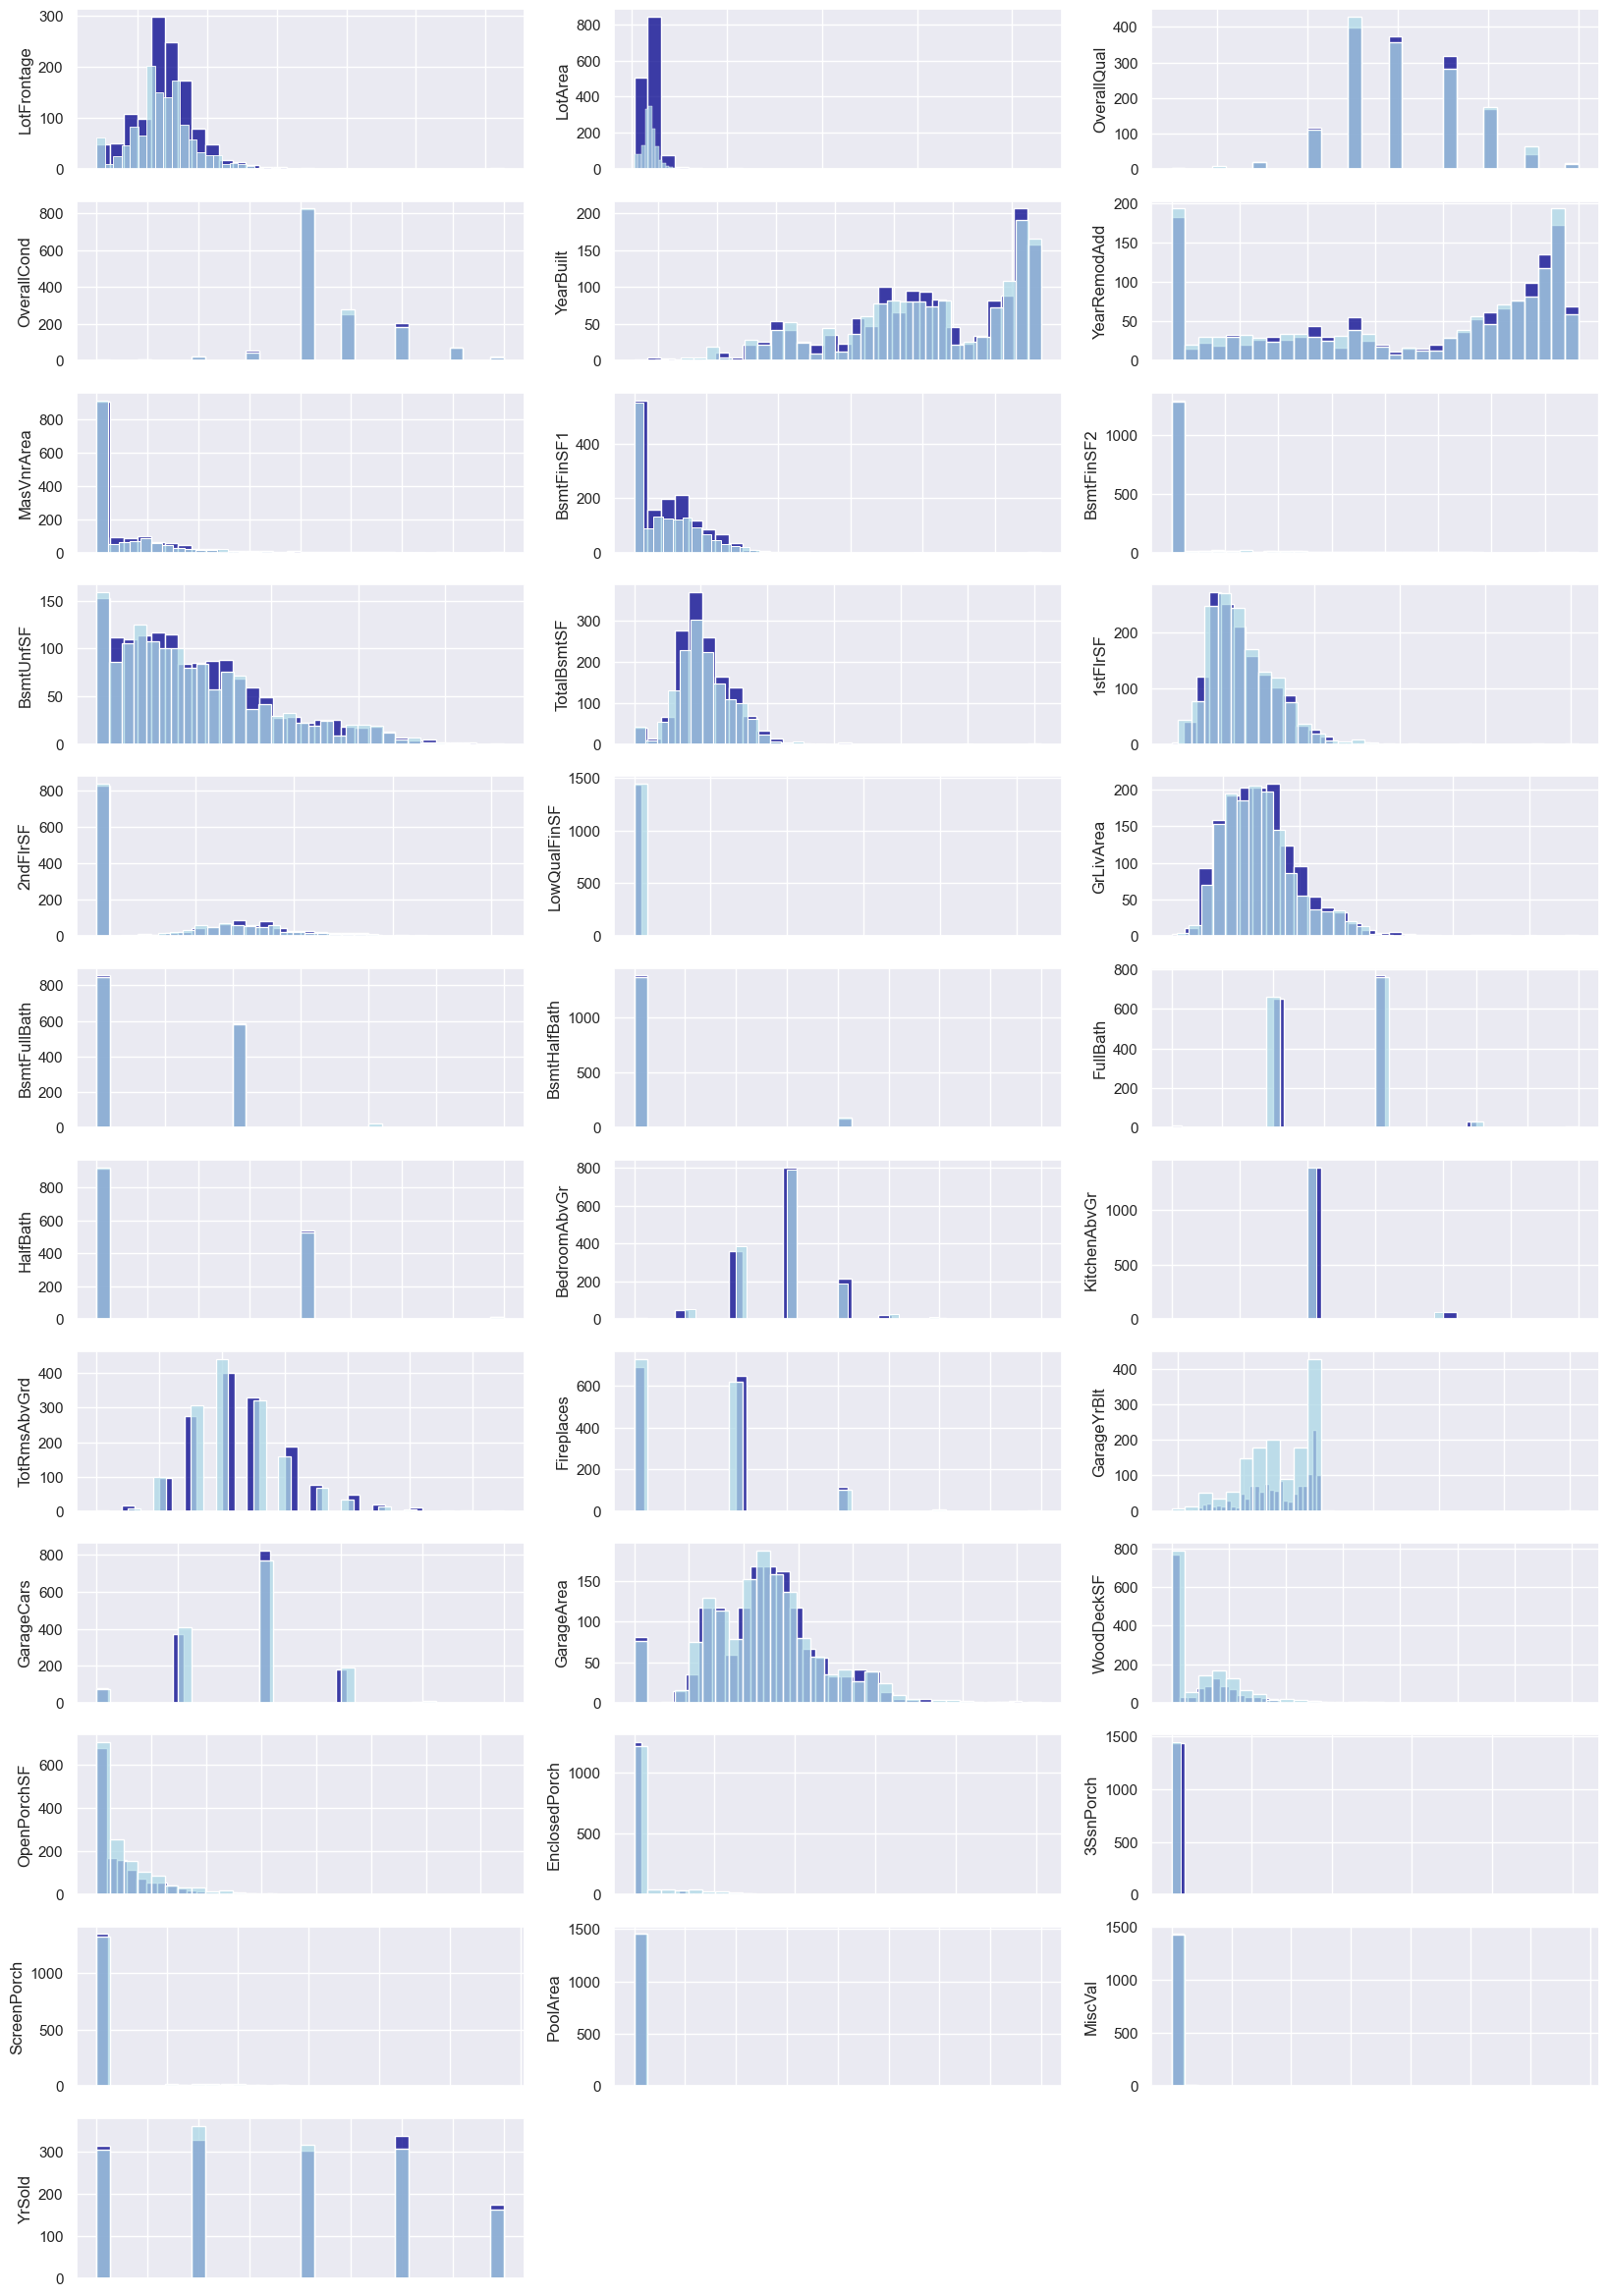

In [16]:
for i, feature in enumerate(num_features):
    plt.subplot(12,3, i*1 + 1)
    plt.ylabel(feature)
    g1 = sns.histplot(data=train1, x=train1[feature], bins=30,  color='darkblue') 
    g2 = sns.histplot(data=test1, x=test1[feature], bins=30, color='lightblue')
    g1.set(xticklabels=[])  
    g1.set(xlabel=None)
    g1.tick_params(bottom=False)  
    g2.set(xticklabels=[])  
    g2.set(xlabel=None)
    g2.tick_params(bottom=False);

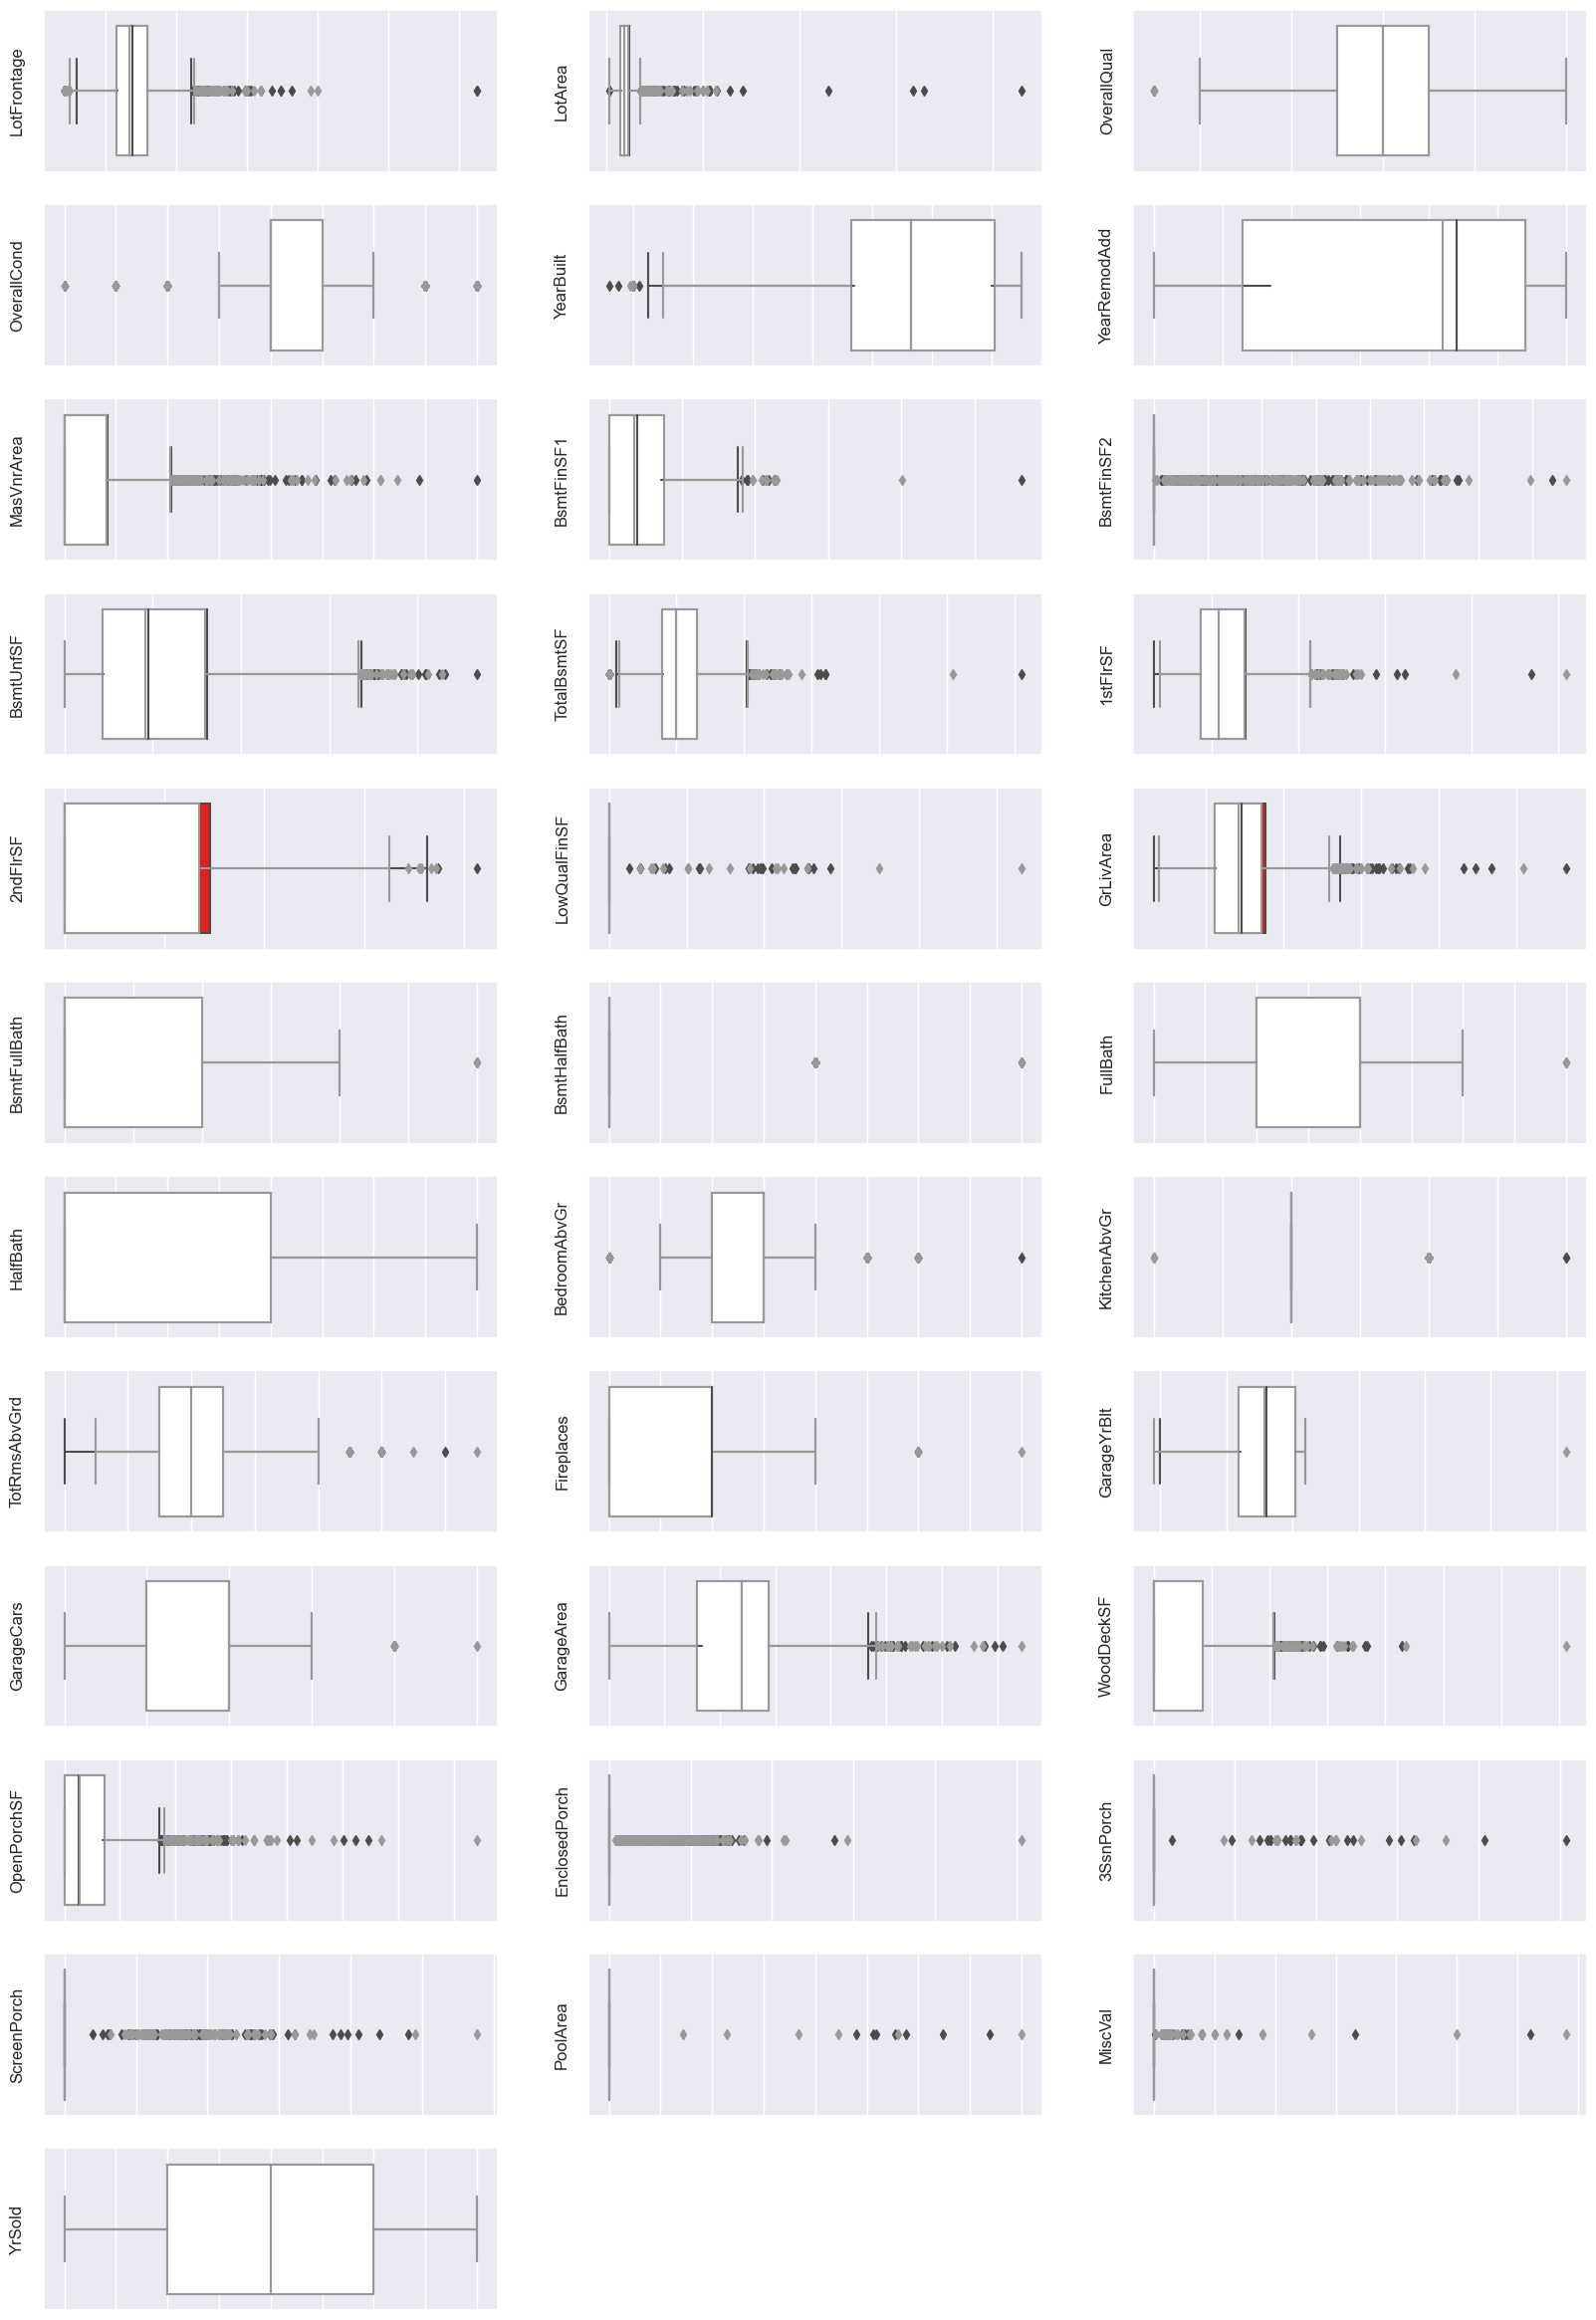

In [17]:
for i, feature in enumerate(num_features):
    plt.subplot(12,3, i*1 + 1)
    plt.ylabel(feature)
    g1 = sns.boxplot(data=train1, x=train1[feature],  color='red') 
    g2 = sns.boxplot(data=test1, x=test1[feature], color='white')
    g1.set(xticklabels=[])  
    g1.set(xlabel=None)
    g1.tick_params(bottom=False)  
    g2.set(xticklabels=[])  
    g2.set(xlabel=None)
    g2.tick_params(bottom=False);

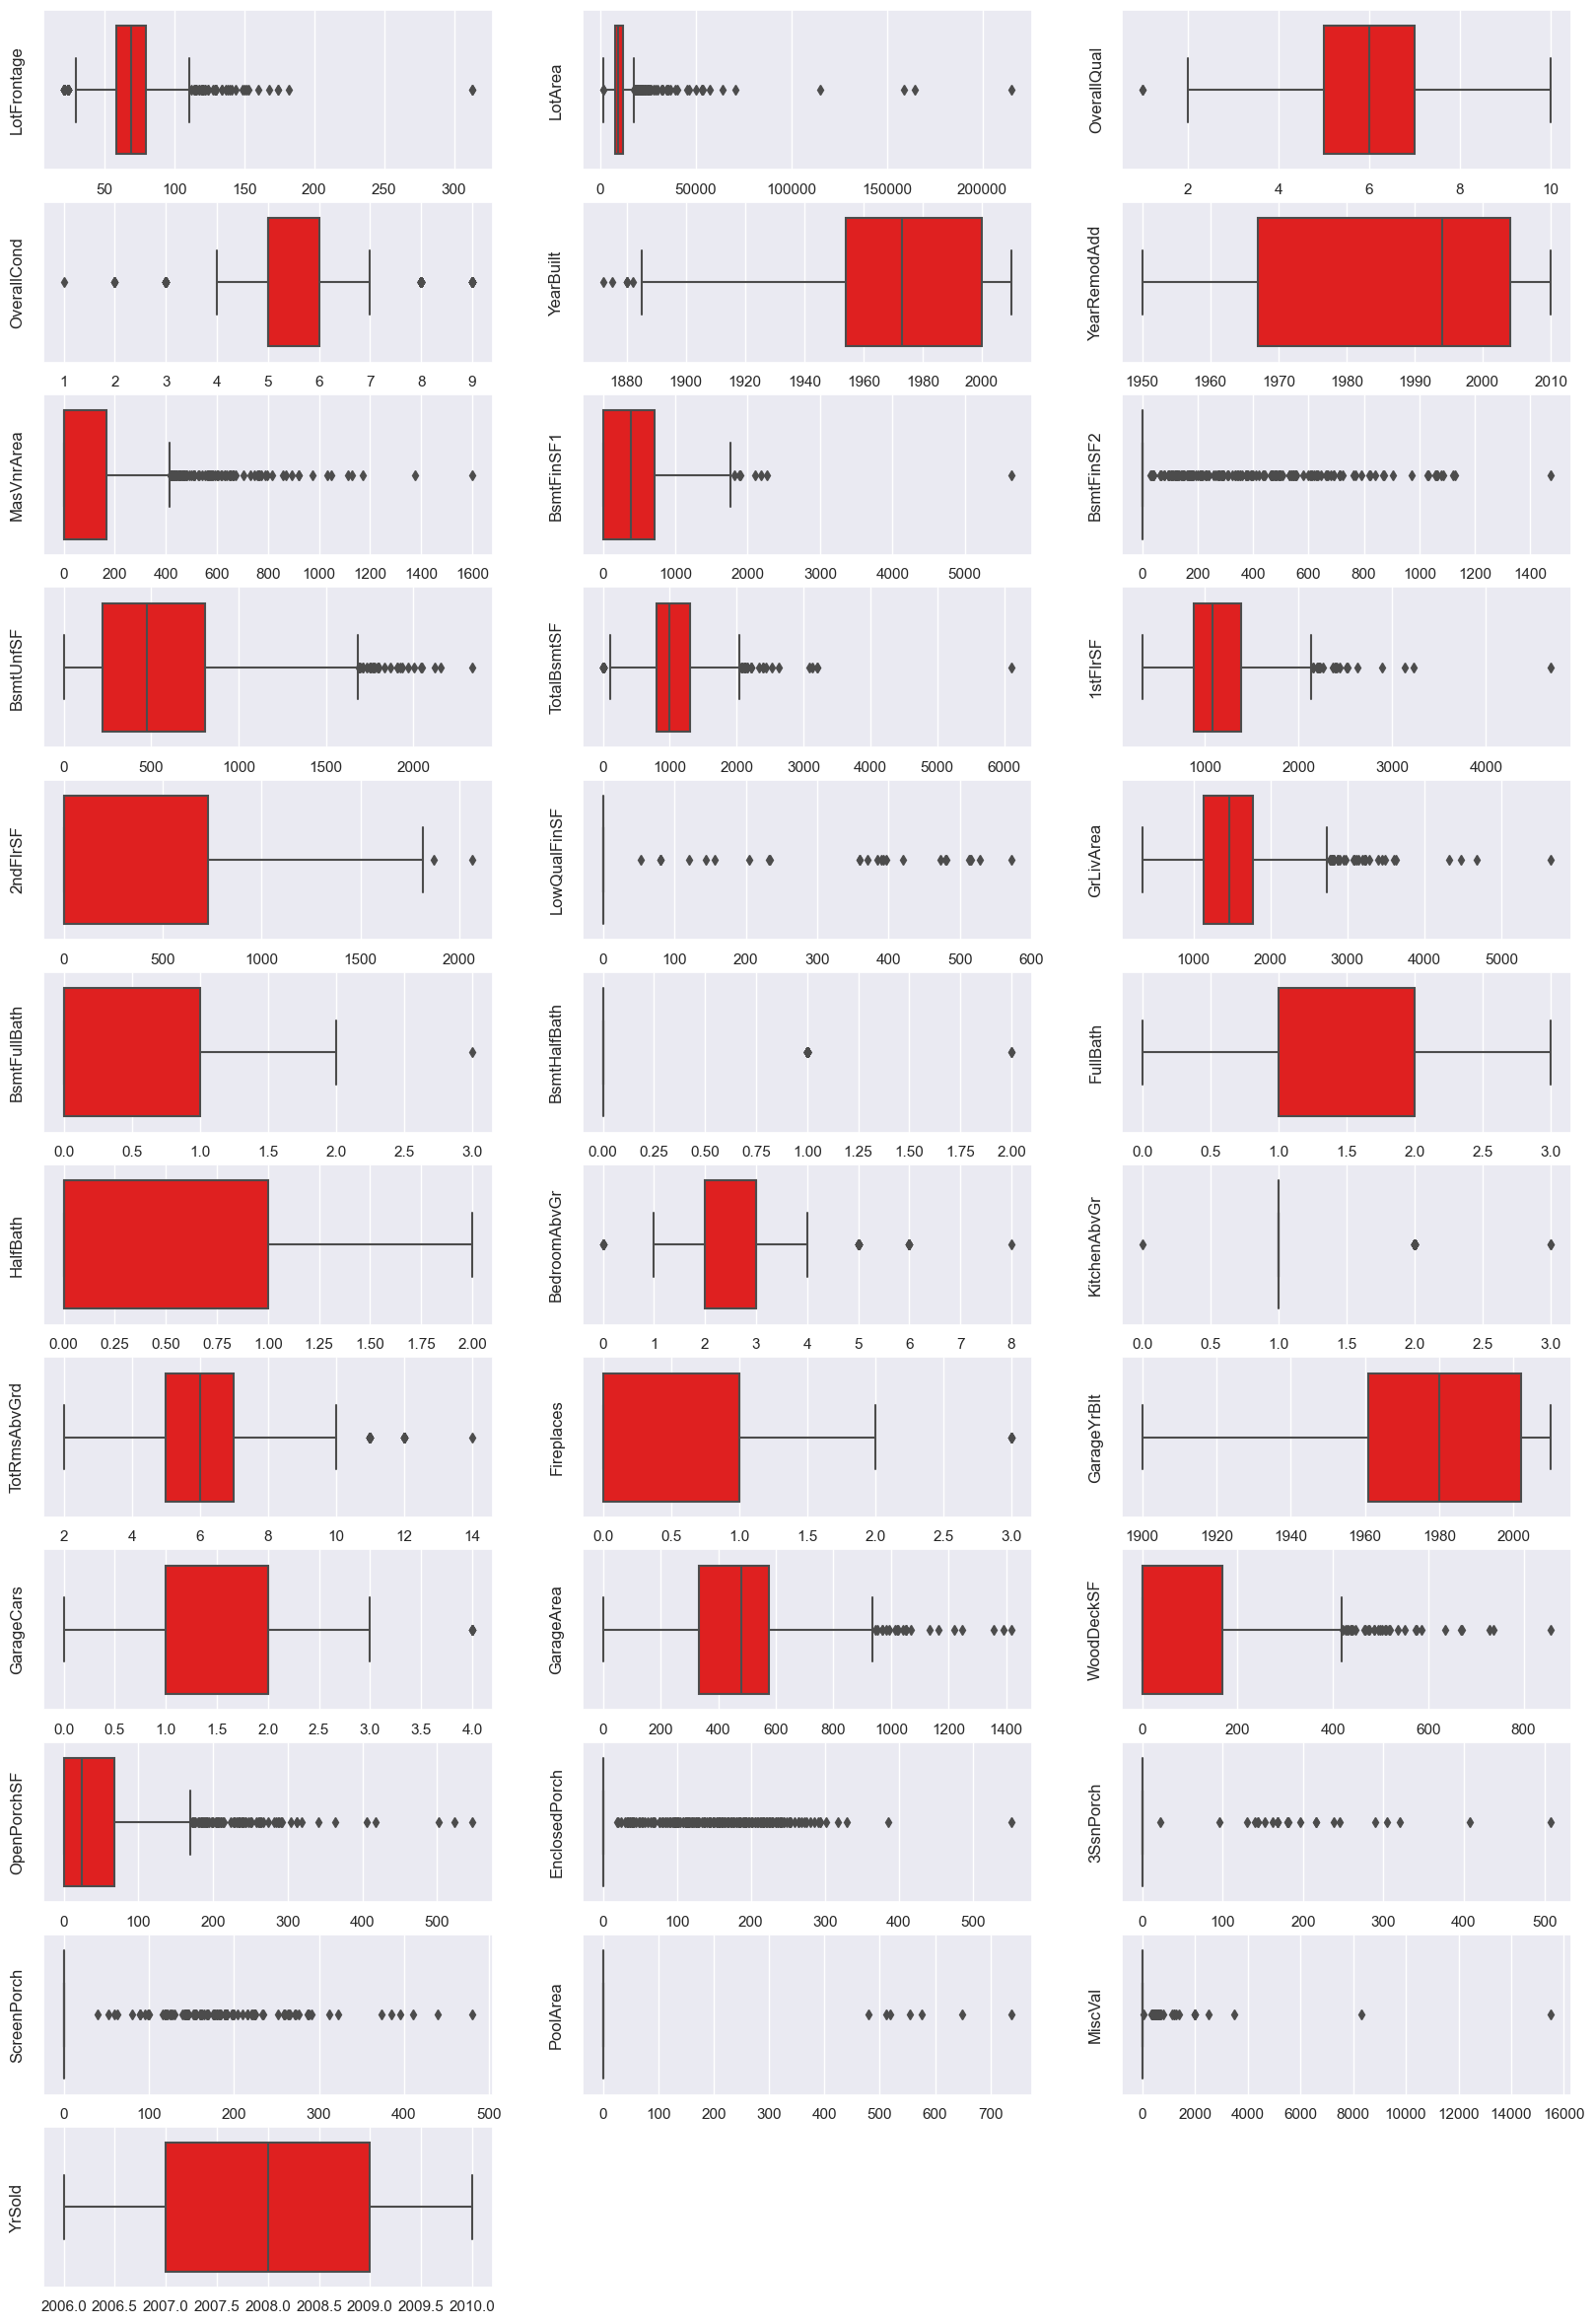

In [18]:
for i, feature in enumerate(num_features):
    plt.subplot(12,3, i*1 + 1)
    plt.ylabel(feature)
    g1 = sns.boxplot(data=train1, x=train1[feature],  color='red') 
    #g1.set(xticklabels=[])  
    g1.set(xlabel=None)
    g1.tick_params(bottom=False)  

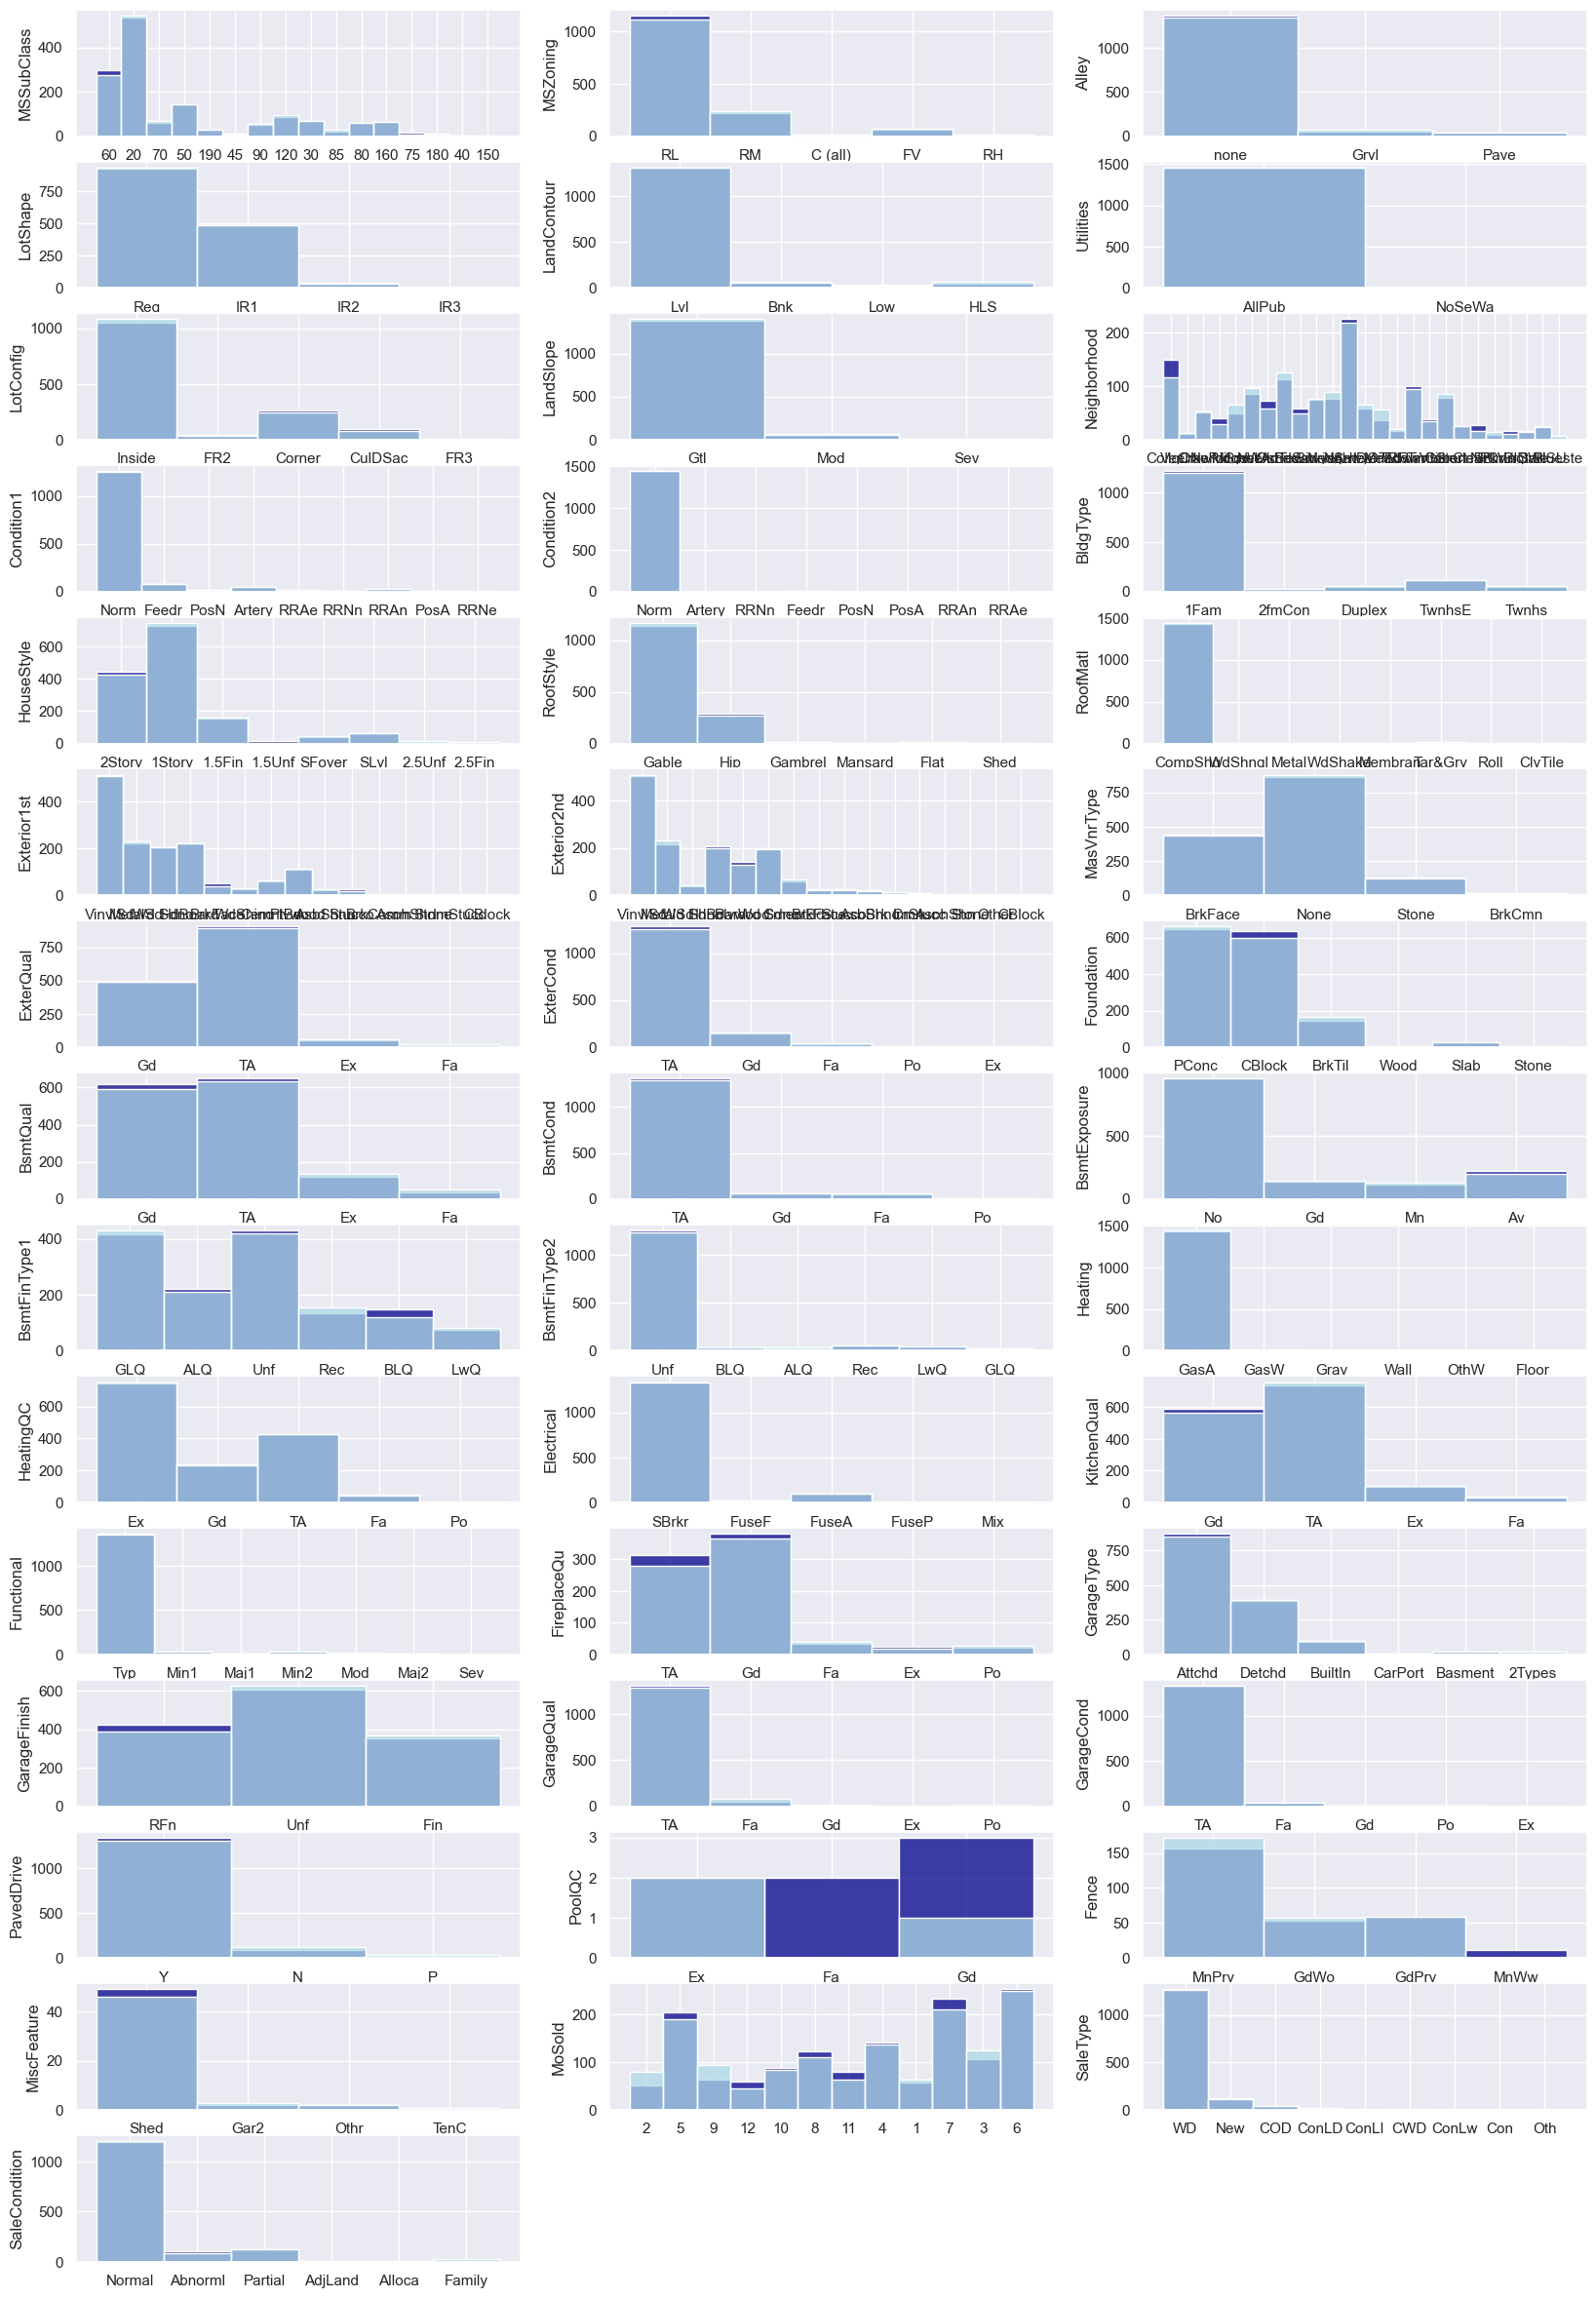

In [19]:
for i, feature in enumerate(cat_features):
    plt.subplot(15,3, i*1 + 1)
    plt.ylabel(feature)
    g1 = sns.histplot(data=train1, x=train1[feature], bins=30, color='darkblue') 
    g2 = sns.histplot(data=test1, x=test1[feature], bins=30, color='lightblue')
    #g1.set(xticklabels=[])  
    g1.set(xlabel=None)
    g1.tick_params(bottom=False)  
    #g2.set(xticklabels=[])  
    g2.set(xlabel=None)
    g2.tick_params(bottom=False);

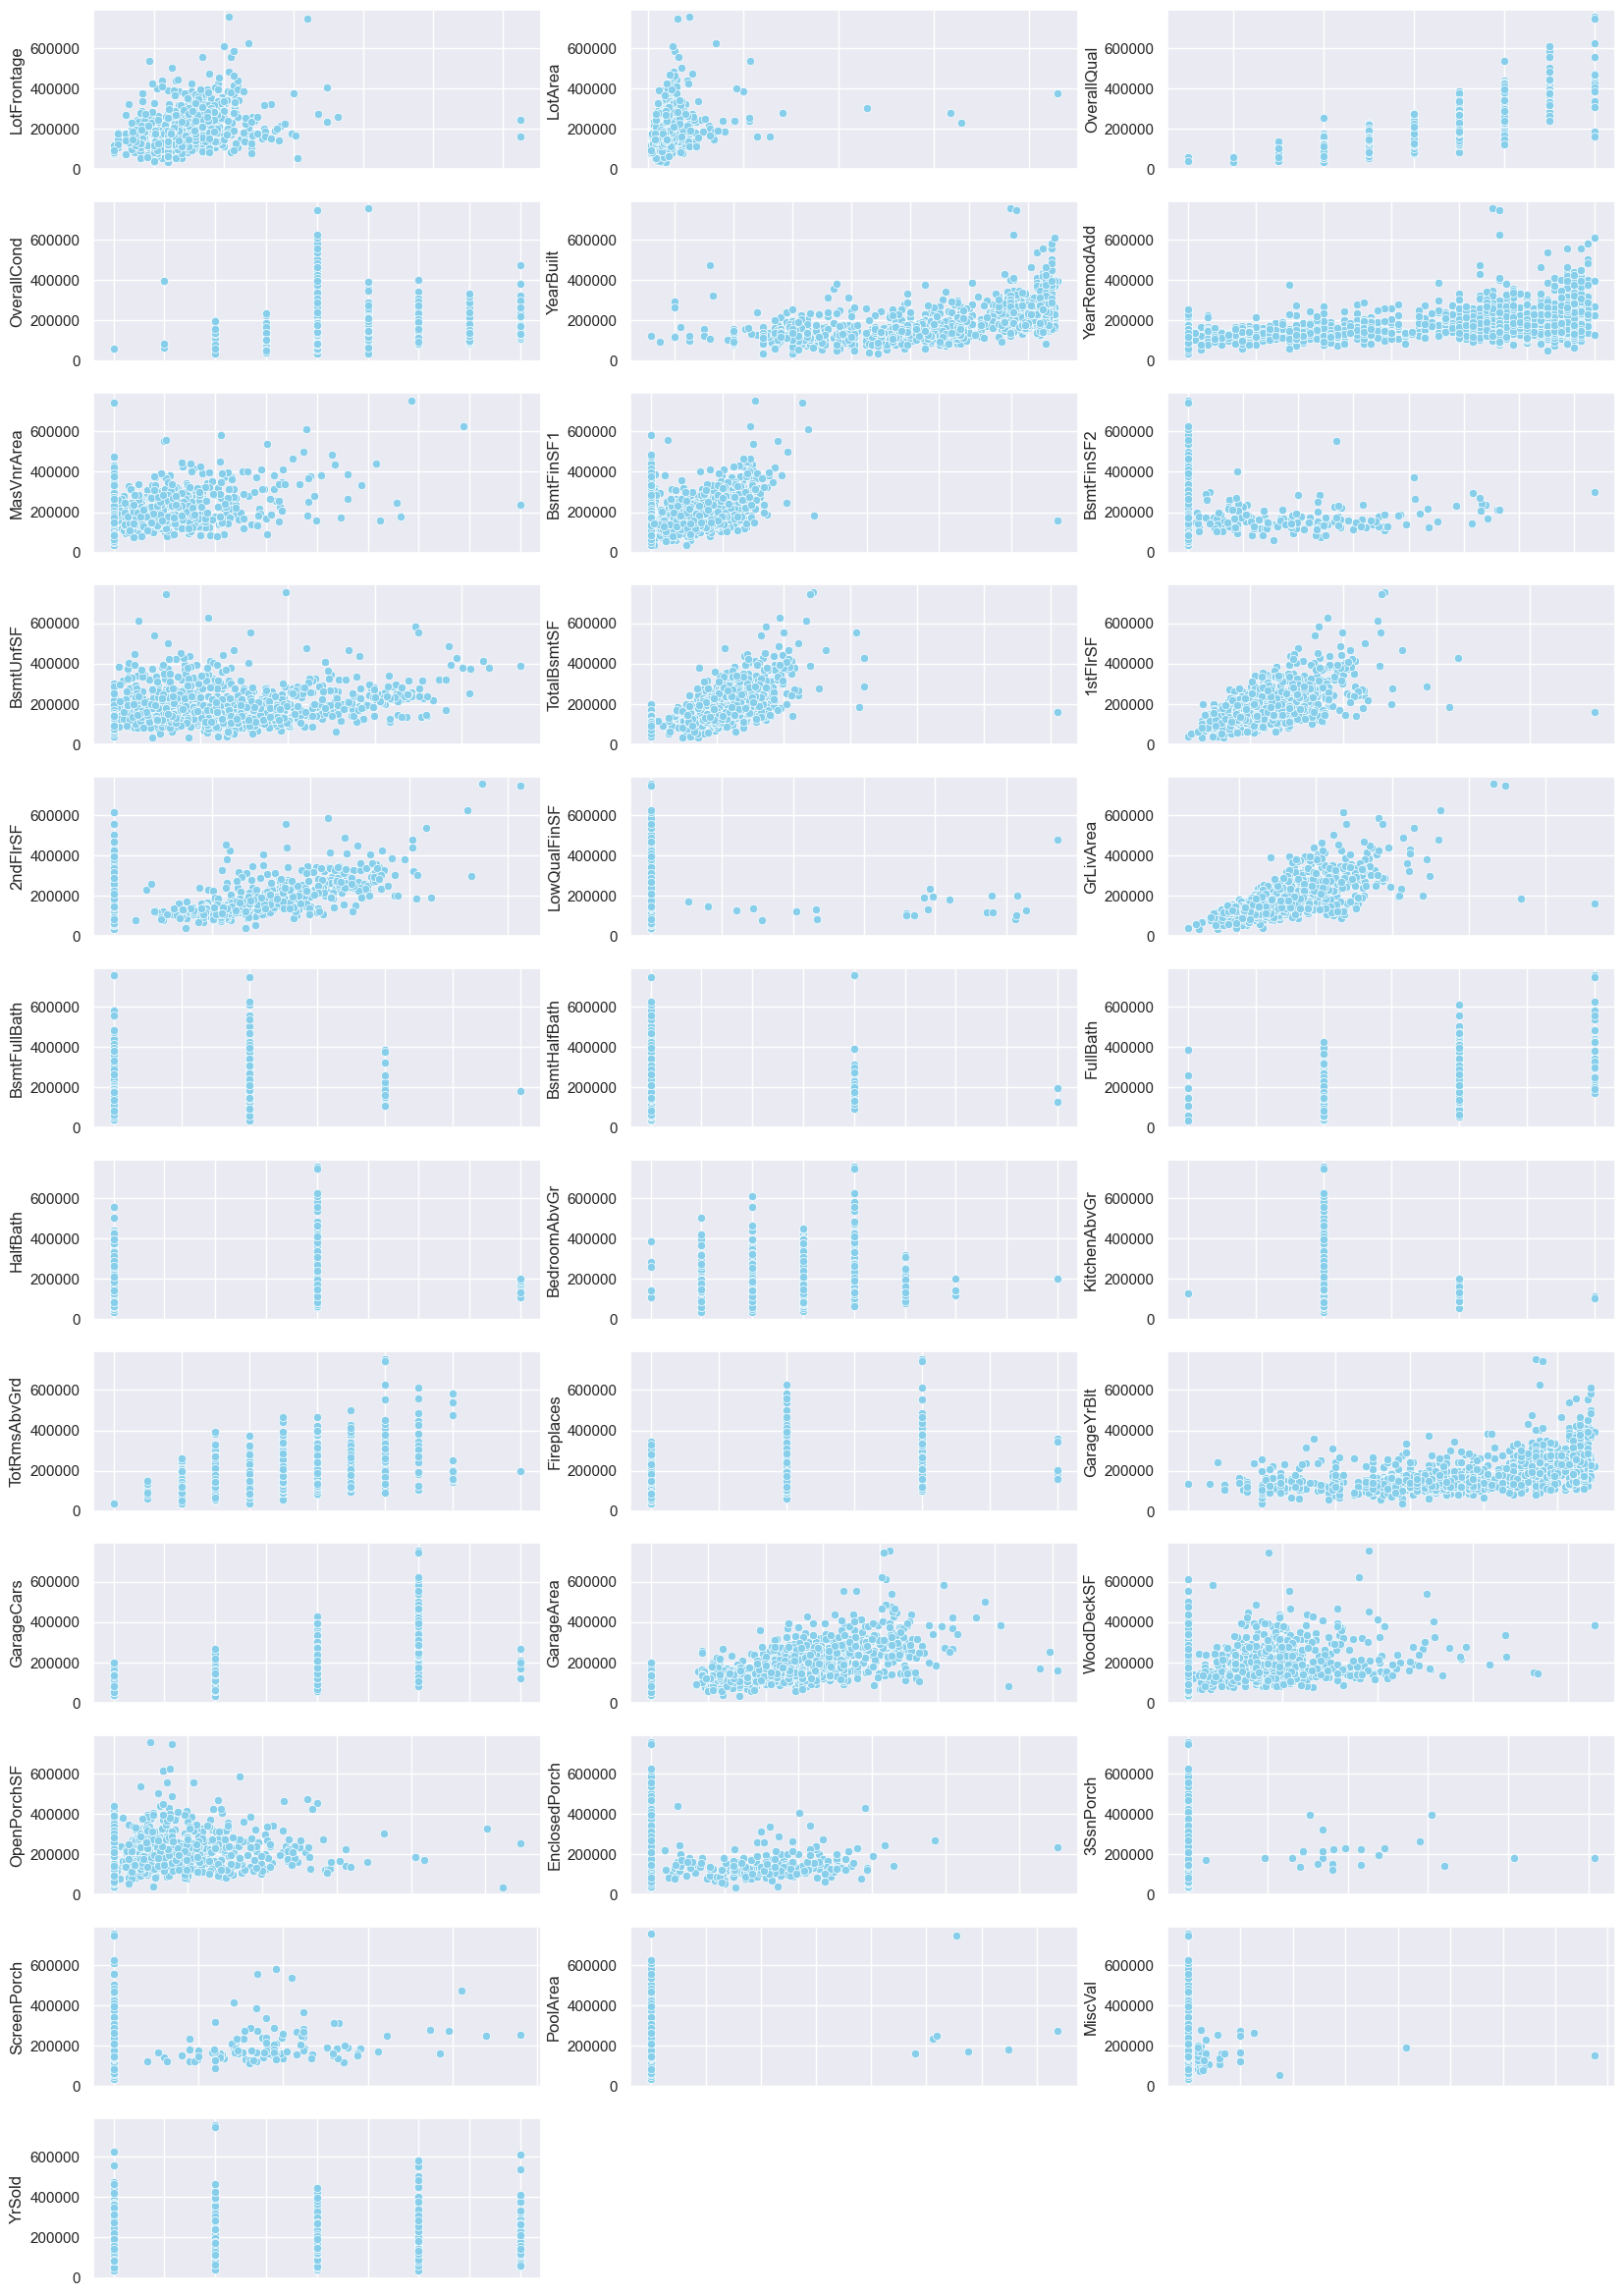

In [20]:
for i, feature in enumerate(num_features):
    plt.subplot(12,3, i*1 + 1)
    plt.ylabel(feature)
    g1 = sns.scatterplot(data=pd.concat([data1, target], axis=1), x=feature, y="SalePrice", color='skyblue') 
    g1.set(xticklabels=[])
    g1.set(xlabel=None)
    g1.tick_params(bottom=False) 

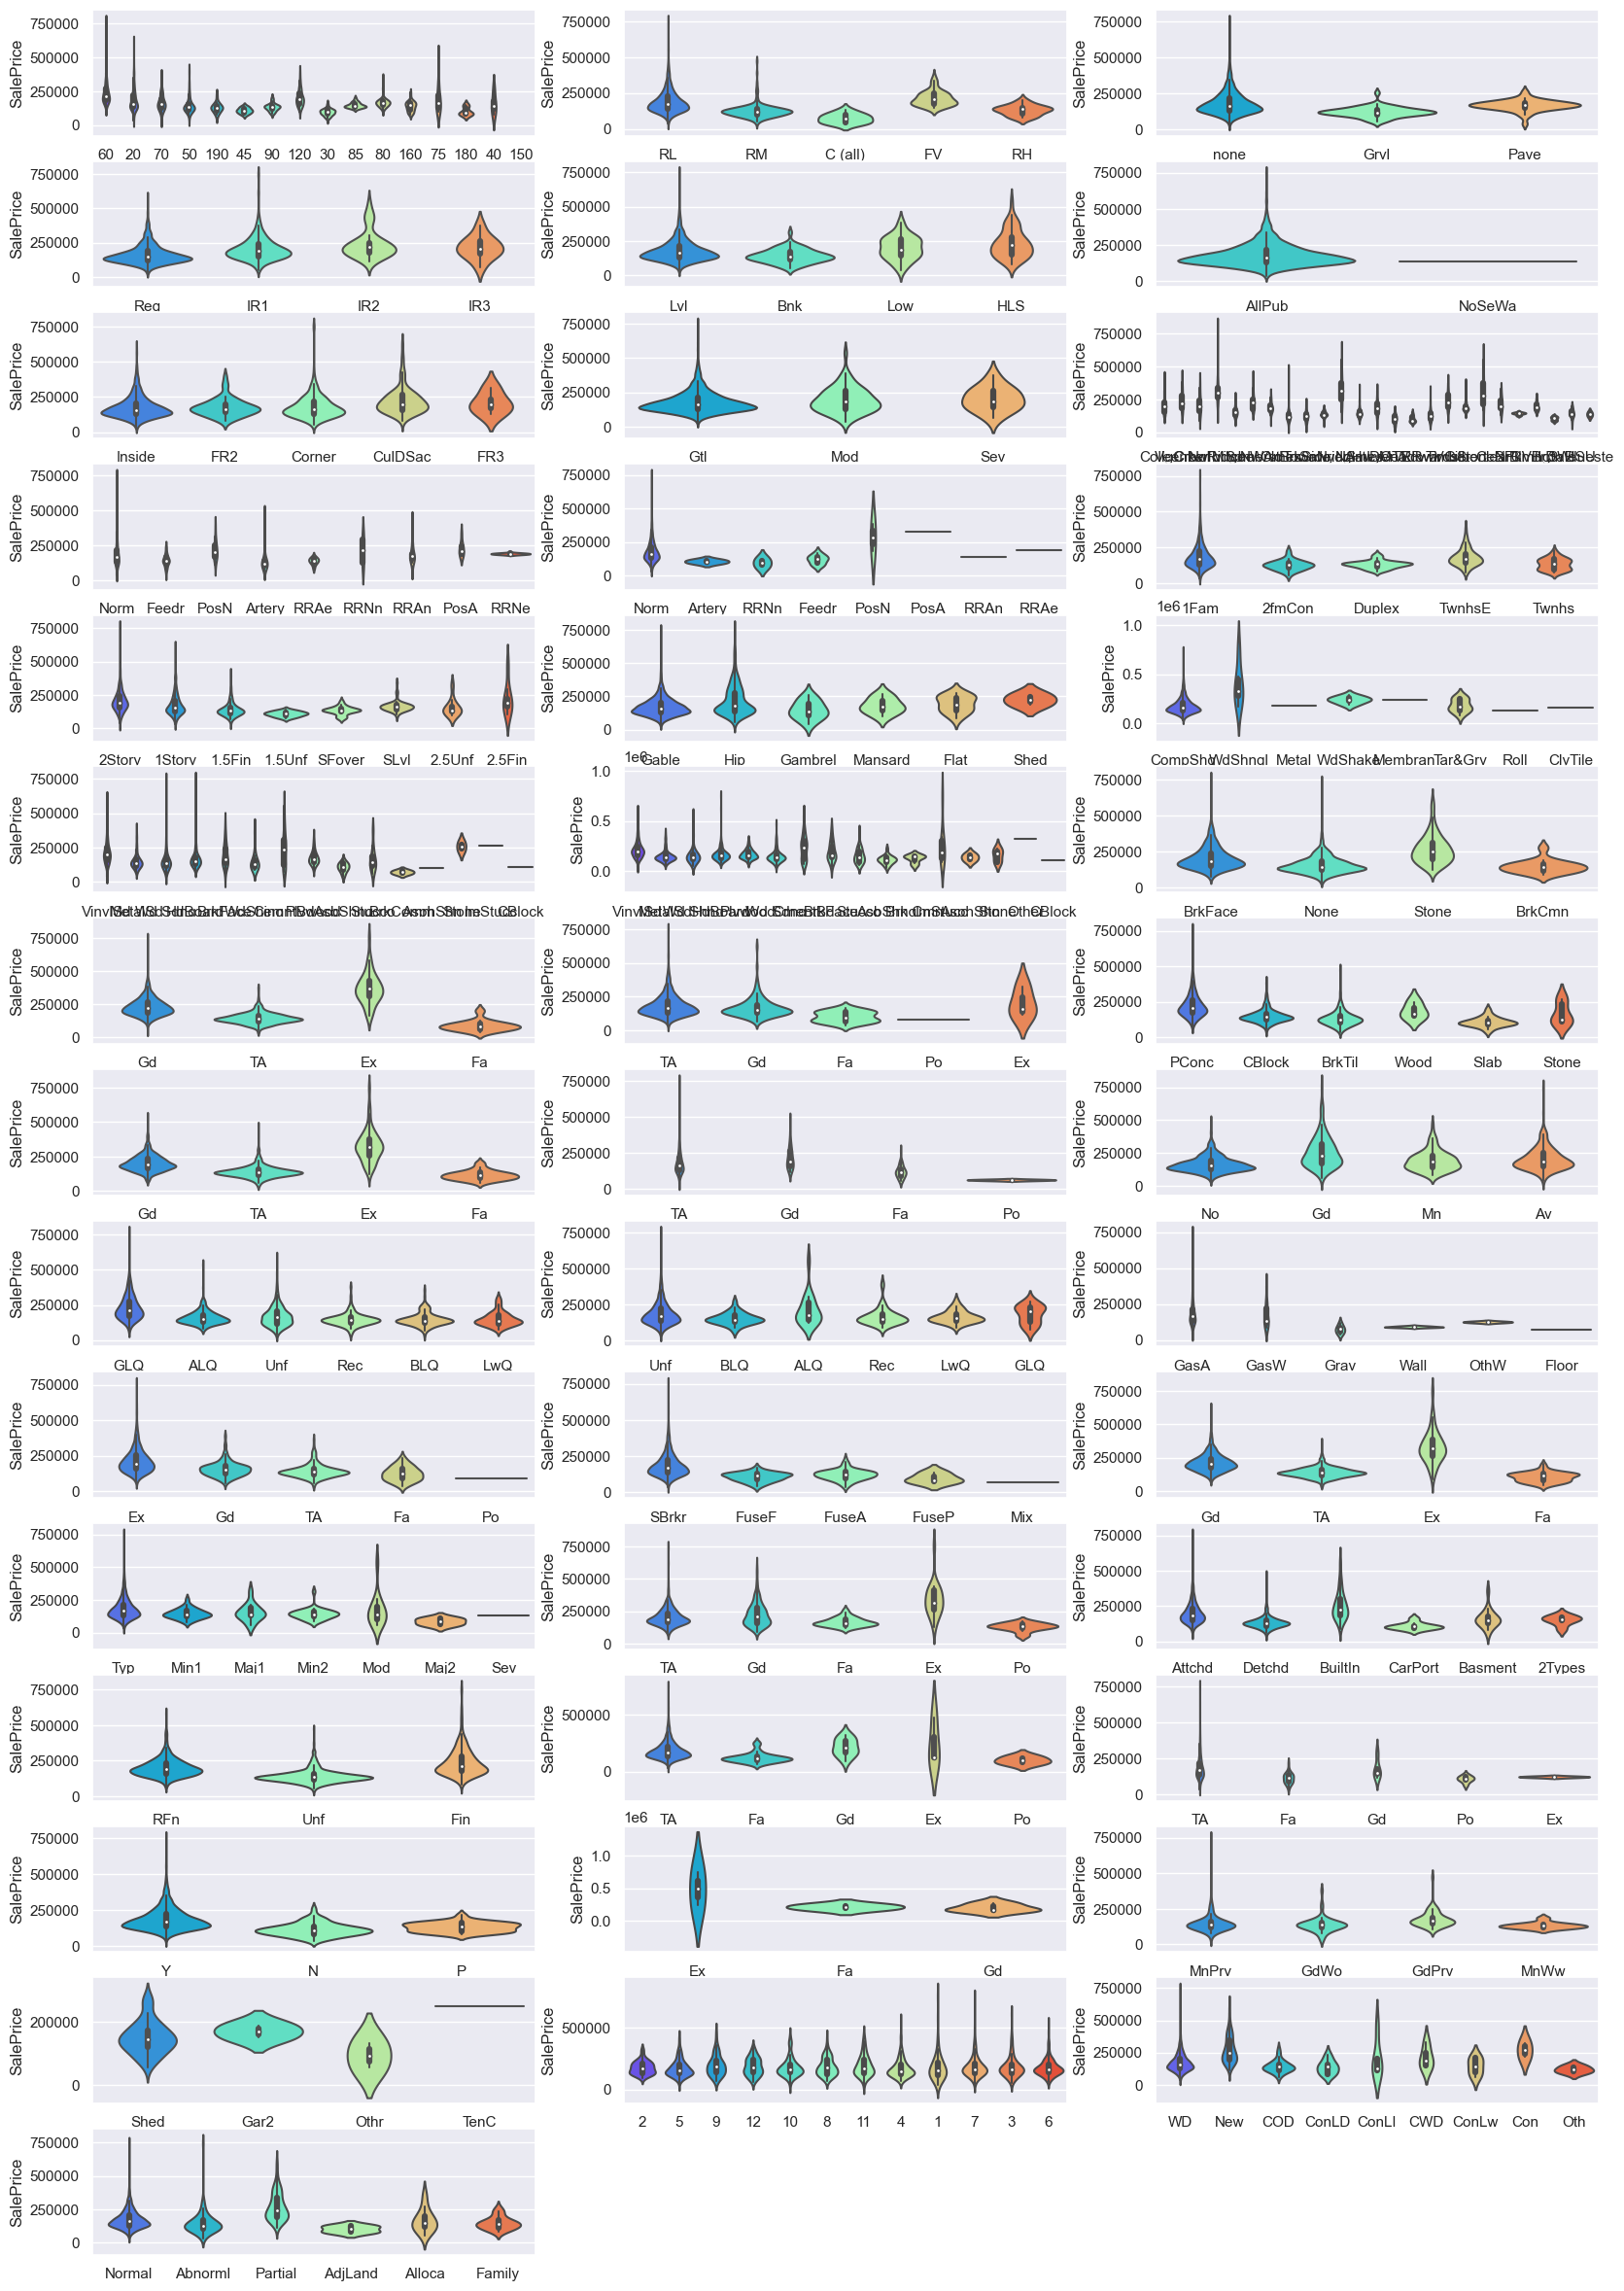

In [21]:
for i, feature in enumerate(cat_features):
    plt.subplot(15,3, i*1 + 1)
    plt.ylabel(feature)
    g1 = sns.violinplot(data=pd.concat([data1, target], axis=1), x=feature, y="SalePrice", palette="rainbow") 
    #g1.set(xticklabels=[])
    g1.set(xlabel=None)
    g1.tick_params(bottom=False) 

### Filling wrong NA values in data

In [22]:
data2 = data1.copy()

In [23]:
m = data2.isna().sum()/len(data2)
m[m>0].sort_values()[::-1]

PoolQC          0.996574
MiscFeature     0.964029
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
KitchenQual     0.000343
GarageCars      0.000343
GarageArea      0.000343
Electrical      0.000343
dtype: float64

In [24]:
data2.loc[(data2["PoolQC"].isna())&(data2["PoolArea"]==0), "PoolQC"] = "none"
data2.loc[(data2["MiscFeature"].isna())&(data2["MiscVal"]==0), "MiscFeature"] = "none"
data2.loc[(data2["FireplaceQu"].isna())&(data2["Fireplaces"]==0), "FireplaceQu"] = "none"
data2["Fence"] = data2["Fence"].fillna("none")

In [25]:
garage_features = list(filter(lambda x: "Garage" in x, data2.columns.values))
data2[garage_features]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
1,Attchd,2003.0,RFn,2.0,548.0,TA,TA
2,Attchd,1976.0,RFn,2.0,460.0,TA,TA
3,Attchd,2001.0,RFn,2.0,608.0,TA,TA
4,Detchd,1998.0,Unf,3.0,642.0,TA,TA
5,Attchd,2000.0,RFn,3.0,836.0,TA,TA
...,...,...,...,...,...,...,...
2915,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2916,CarPort,1970.0,Unf,1.0,286.0,TA,TA
2917,Detchd,1960.0,Unf,2.0,576.0,TA,TA


In [26]:
data2.loc[(data2["GarageType"].isna())&(data2["GarageCond"].isna())&(data2["GarageYrBlt"].isna())
         &(data2["GarageFinish"].isna())&(data2["GarageCars"]==0)&(data2["GarageArea"]==0)&(data2["GarageQual"].isna()),
         ["GarageType", "GarageCond", "GarageFinish", "GarageQual"]] = "none"

In [27]:
bsmt_features = list(filter(lambda x: "Bsmt" in x, data2.columns.values))
data2[bsmt_features]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
1,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1.0,0.0
2,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,0.0,1.0
3,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1.0,0.0
4,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1.0,0.0
5,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2915,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,0.0,0.0
2916,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,0.0,0.0
2917,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,1.0,0.0


In [28]:
data2.loc[(data2["BsmtQual"].isna())&(data2["BsmtCond"].isna())&(data2["BsmtExposure"].isna())
          &(data2["BsmtFinType1"].isna())&(data2["BsmtFinType2"].isna())
          &(data2["BsmtFinSF1"]==0)&(data2["BsmtFinSF2"]==0)&(data2["BsmtFullBath"]==0),
          ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]] = "none"

### Finding anomalies

In [29]:
train1.shape[0]

1460

In [30]:
#indexes_to_delete = []
#indexes_to_delete.append(list(train1.loc[train1["BsmtFullBath"]>2.5].index.values))
#indexes_to_delete.append(list(train1.loc[train1["GarageCars"]>3.5].index.values))
#indexes_to_delete.append(list(train1.loc[train1["TotRmsAbvGrd"]>13].index.values))
#indexes_to_delete.append(list(train1.loc[train1["TotalBsmtSF"]>5000].index.values))
#indexes_to_delete.append(list(train1.loc[train1["BsmtFinSF1"]>5000].index.values))
#indexes_to_delete.append(list(train1.loc[train1["LotFrontage"]>250].index.values))
#indexes_to_delete.append(list(train1.loc[train1["LotArea"]>150000].index.values))
#itd = []
#for i in indexes_to_delete:
#    for j in i:
#        itd.append(j)
#indexes_to_delete = itd

In [31]:
#train1 = train1.drop(indexes_to_delete)
#target = target.drop(indexes_to_delete)

In [32]:
train1.shape[0]

1460

In [33]:
train_id = train1.index.values

In [34]:
data2A = data2.copy()
for col in cat_features:
    data2A[col] = data2[col].fillna(data2[col].mode()[0])
for col in num_features:
    data2A[col] = data2[col].fillna(data2[col].median)

In [35]:
#data2A = data2.fillna({col:data2[col].mode()[0] for col in data2.select_dtypes("O").columns.array})
#data2A = data2.fillna({col:data2[col].median() for col in data2.select_dtypes(np.number).columns.array})

In [36]:
iforest = IsolationForest()
anom_pred = iforest.fit_predict(pd.get_dummies(data2A))

In [37]:
is_anom_pred = np.array(list(map(lambda x: 1 if x == 0 else 0, anom_pred)))

In [38]:
is_anom_pred.sum()

0

### Missing Imputation

In [39]:
data3 = data2.copy()

In [40]:
m = data3.isna().sum()/len(data3)
m = m[m>0].sort_values()
m_num = data3.select_dtypes(np.number).isna().sum()/len(data3)
m_num = m_num[m_num>0].sort_values()
m_cat = data3.select_dtypes("O").isna().sum()/len(data3)
m_cat = m_cat[m_cat>0].sort_values()

In [41]:
num_features_to_impute = m_num.index.values
cat_features_to_impute = m_cat.index.values
features_to_impute = m.index.values

In [42]:
def imputation_rf(data, target, features_to_impute):
    ALL = data.copy()
    TARGET = ALL.copy().loc[~ALL[target].isna(), target]
    ALL = ALL.drop(ALL[features_to_impute], axis=1)
    ALL = pd.get_dummies(ALL)
    X_TRAIN = ALL.loc[~pd.concat([ALL, TARGET], axis=1)[target].isna()]
    X_TEST = ALL.loc[pd.concat([ALL, TARGET], axis=1)[target].isna()]
        
    if target in data.select_dtypes(np.number).columns:
        f = RandomForestRegressor(max_depth=13).fit(X_TRAIN, TARGET)
    else:
        f = RandomForestClassifier(max_depth=13).fit(X_TRAIN, TARGET)
            
    pred = f.predict(X_TEST)
        
    return pred    

In [43]:
for feature in cat_features_to_impute:
    pred = imputation_rf(data3, feature, features_to_impute)
    data3.loc[data3[feature].isna(), feature] = pred
    m = data3.isna().sum()/len(data3)
    m = m[m>0].sort_values()
    features_to_impute = m.index.values

In [44]:
r = RandomForestRegressor(max_depth=14)
data3X = pd.get_dummies(data3)
imputer = IterativeImputer(r, max_iter=5000)
data3X = pd.DataFrame(imputer.fit_transform(data3X), columns=data3X.columns, index=data3.index)

In [45]:
data3[num_features_to_impute] = data3X[num_features_to_impute]

In [46]:
data3.isna().sum().sum()

0

### Feature engineering

In [47]:
data4 = data3.copy()

In [48]:
data4["TotalQual"] = 0.5*data4["OverallCond"] + 0.5*data4["OverallQual"]

#data4["TotalQual"] = data4["TotalQual"].map(str)
data4["OverallCond"] = data4["OverallCond"].map(str)
data4["OverallQual"] = data4["OverallQual"].map(str)

data4["YearDiff"] = (data4["YearRemodAdd"] - data4["YearBuilt"])

data4["TotalBath"] = data4["BsmtFullBath"] + 0.5*data4["BsmtHalfBath"] + data4["FullBath"] + 0.5*data4["HalfBath"]

data4["LivingShare"] = data4["GrLivArea"]/data4["LotArea"]

In [49]:
skew_data = pd.DataFrame({"Feature":data4.select_dtypes(np.number).columns, "Skew":np.abs(stats.skew(data4.select_dtypes(np.number)))})
skew_data["IsNeededSkew"] = np.abs(skew_data["Skew"]) > 1
for col in skew_data.loc[skew_data["IsNeededSkew"], "Feature"]:
    if col == "MasVnrArea":
        continue
    prev_skew = float(abs(skew_data.loc[skew_data["Feature"]==col, "Skew"]))
    data4[col] = np.log1p(data4[col])
    temp_skew = np.abs(stats.skew(data4[col]))
    if temp_skew < prev_skew:
        data4["log_"+col] = data4[col]
        data4 = data4.drop(col, axis=1)
        continue
    data4[col] = np.exp(data4[col]) - 1

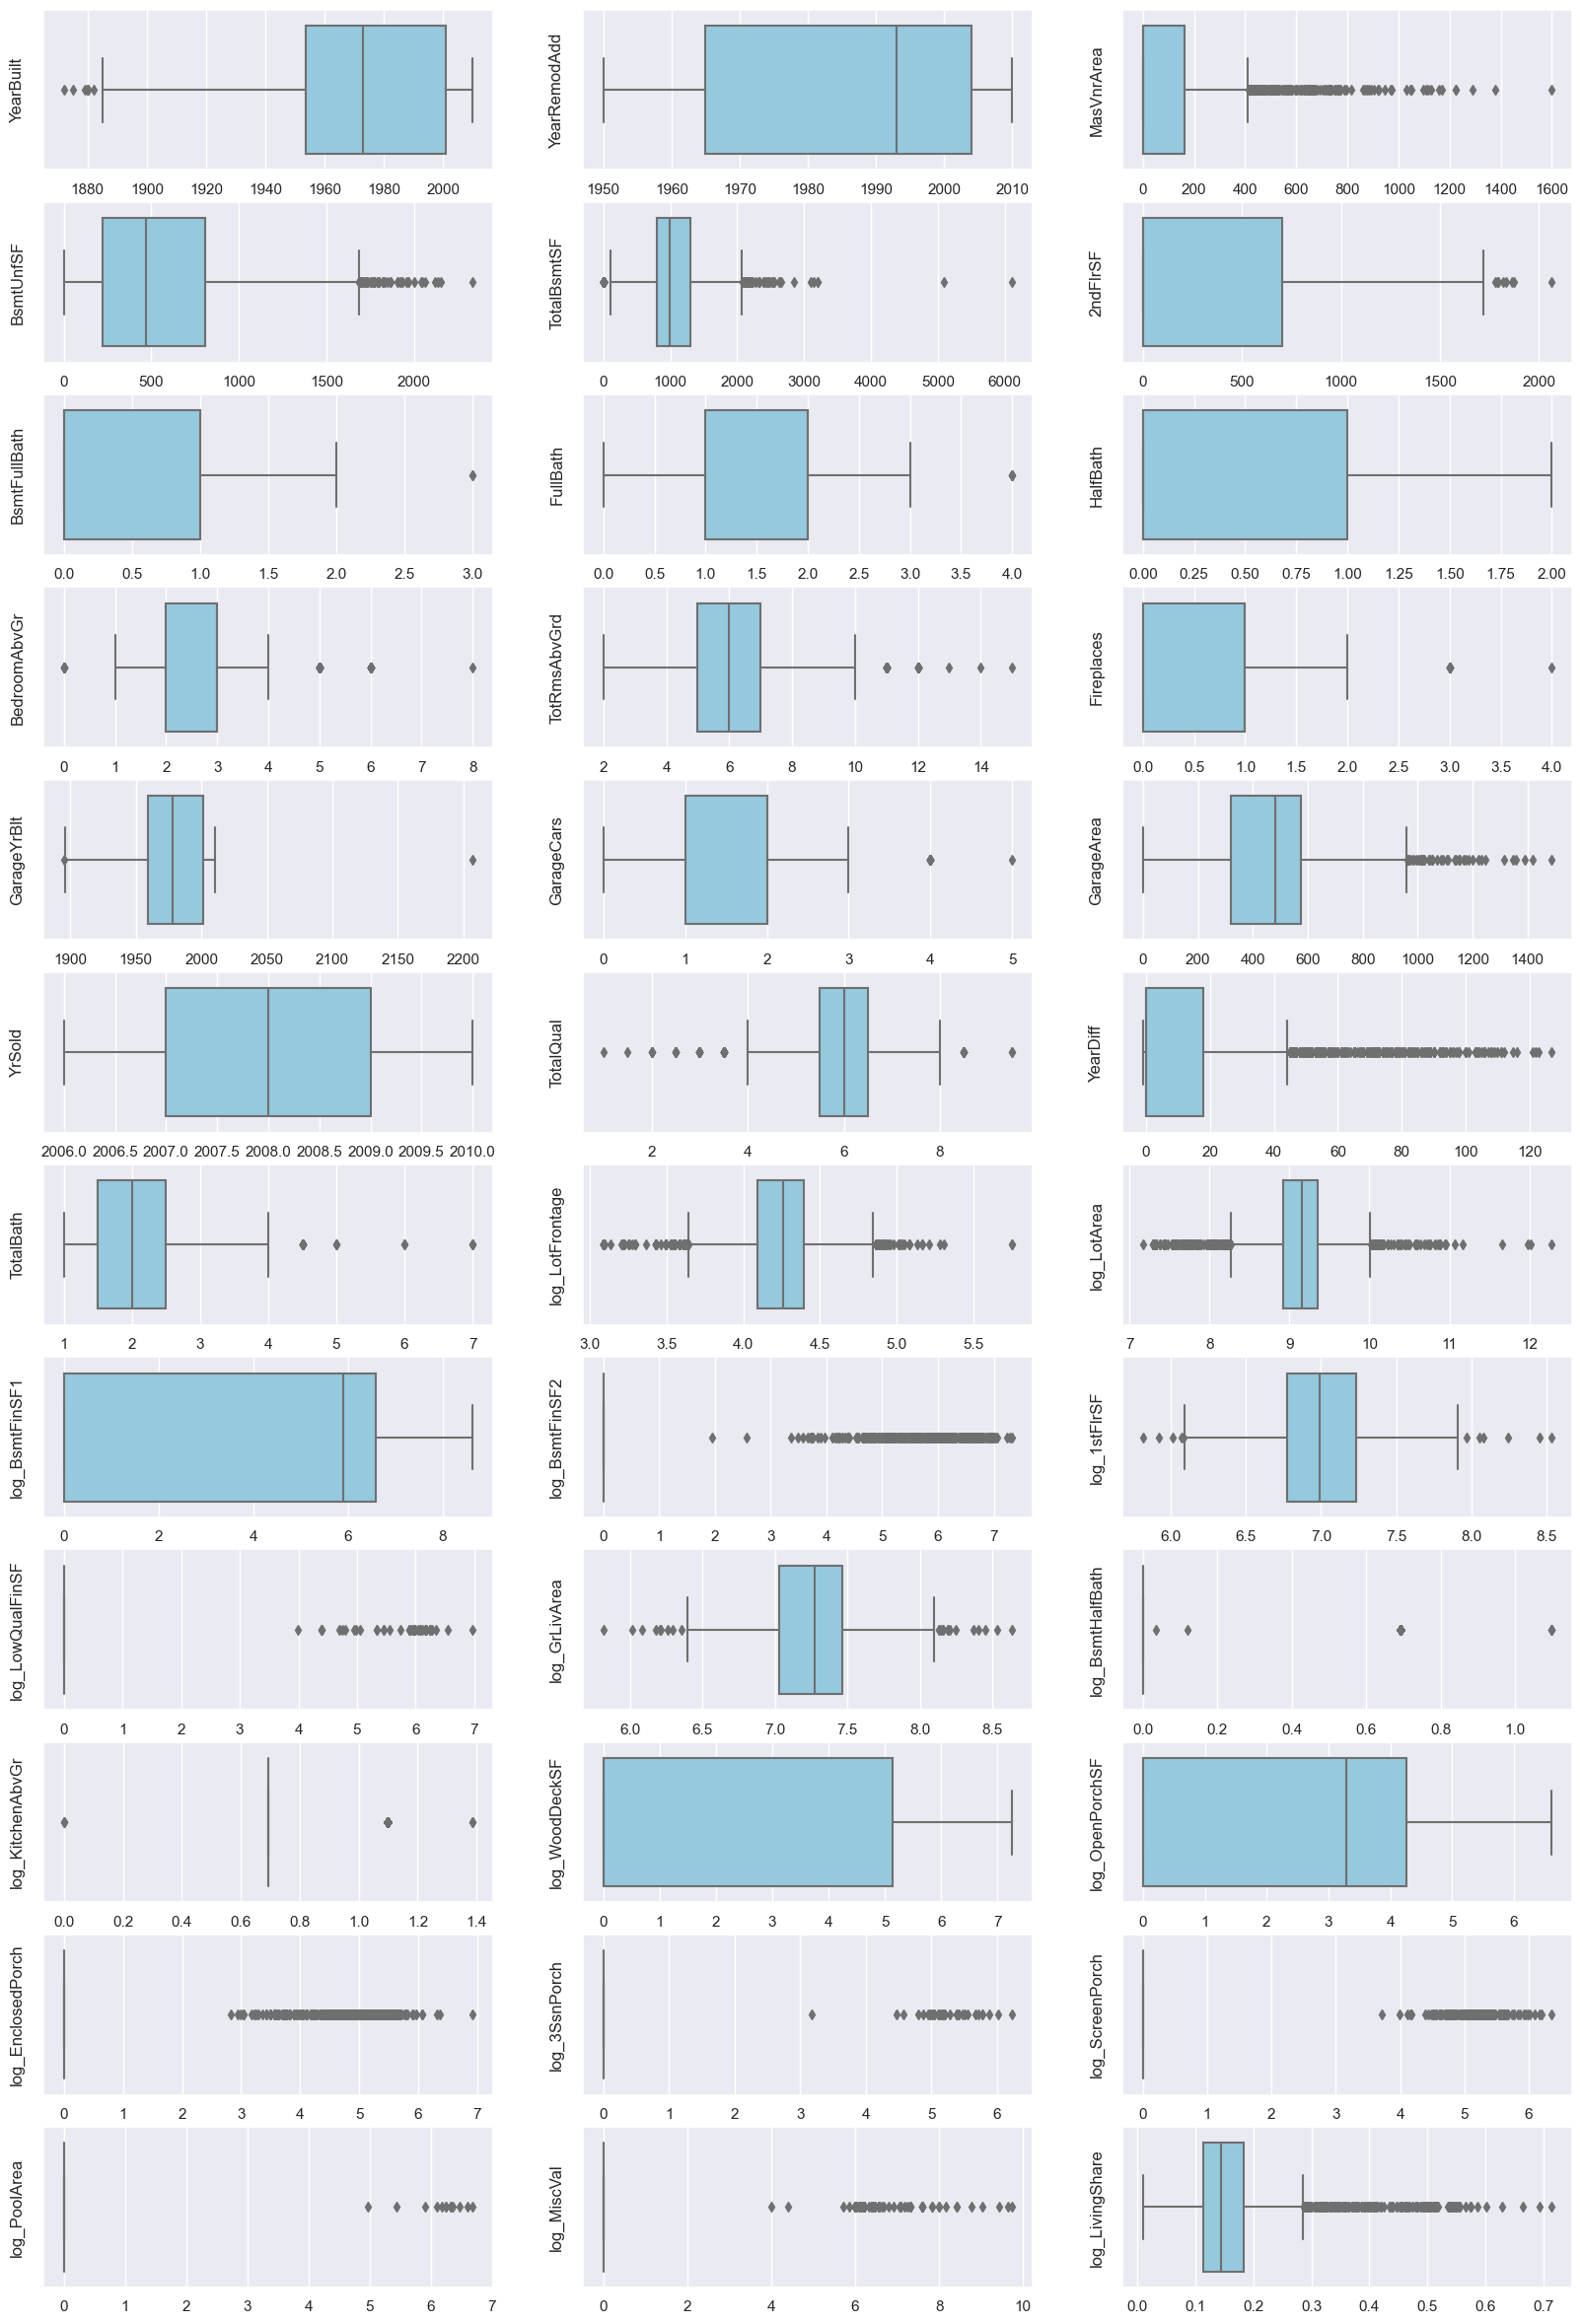

In [50]:
for i, feature in enumerate(data4.select_dtypes(np.number).columns):
    plt.subplot(12,3, i*1 + 1)
    plt.ylabel(feature)
    g1 = sns.boxplot(data=data4, x=feature, color='skyblue') 
    #g1.set(xticklabels=[])
    g1.set(xlabel=None)
    g1.tick_params(bottom=False) 

In [51]:
data4.loc[data4["GarageYrBlt"]>2100, "GarageYrBlt"] = data4["GarageYrBlt"].median()

In [52]:
log_target = np.log(target)

### Modeling

In [111]:
seed = 42
kf = KFold(10, random_state=seed)

In [112]:
num_data4 = StandardScaler().fit_transform(data4.select_dtypes(np.number))
X = data4.copy()
X[data4.select_dtypes(np.number).columns] = num_data4

In [165]:
X.loc[:,X.select_dtypes("O").columns] = X.select_dtypes("O").astype("category")
X.loc[:, X.select_dtypes(bool).columns] = X.select_dtypes(bool).astype("category")

In [113]:
X_D = pd.get_dummies(X)

In [114]:
X_TRAIN = X.loc[train_id]
X_train, X_val, y_train, y_val = train_test_split(X_TRAIN, log_target, test_size = 0.25, random_state=seed)
X_TEST = X.loc[test_id]

In [76]:
regression.setup(pd.concat([pd.get_dummies(X_TRAIN), log_target], axis=1), target="SalePrice")
regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0784,0.0142,0.1169,0.9137,0.0091,0.0066,2.9370
lightgbm,Light Gradient Boosting Machine,0.0868,0.0165,0.1268,0.8994,0.0098,0.0073,0.2480
gbr,Gradient Boosting Regressor,0.0863,0.0169,0.1279,0.8970,0.0099,0.0072,0.2020
rf,Random Forest Regressor,0.0891,0.0180,0.1325,0.8902,0.0103,0.0074,0.5050
br,Bayesian Ridge,0.0817,0.0187,0.1298,0.8853,0.0100,0.0068,0.0330
xgboost,Extreme Gradient Boosting,0.0960,0.0202,0.1402,0.8757,0.0109,0.0080,0.4630
ridge,Ridge Regression,0.0864,0.0202,0.1359,0.8749,0.0104,0.0072,0.0070
omp,Orthogonal Matching Pursuit,0.0866,0.0210,0.1365,0.8702,0.0105,0.0073,0.0080
et,Extra Trees Regressor,0.0964,0.0212,0.1444,0.8700,0.0112,0.0080,0.5540
huber,Huber Regressor,0.0952,0.0239,0.1530,0.8503,0.0119,0.0080,0.1740


In [77]:
regression.setup(pd.concat([X_TRAIN, log_target], axis=1), target="SalePrice")
regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0751,0.0120,0.1080,0.9245,0.0084,0.0063,0.0380
omp,Orthogonal Matching Pursuit,0.0799,0.0128,0.1118,0.9190,0.0087,0.0067,0.0200
ridge,Ridge Regression,0.0800,0.0136,0.1155,0.9133,0.0090,0.0067,0.0190
catboost,CatBoost Regressor,0.0810,0.0142,0.1174,0.9113,0.0091,0.0068,3.1200
gbr,Gradient Boosting Regressor,0.0865,0.0156,0.1235,0.9020,0.0096,0.0072,0.2290
lightgbm,Light Gradient Boosting Machine,0.0886,0.0163,0.1260,0.8972,0.0098,0.0074,0.1860
rf,Random Forest Regressor,0.0944,0.0192,0.1369,0.8796,0.0106,0.0079,0.4410
huber,Huber Regressor,0.0917,0.0193,0.1378,0.8727,0.0108,0.0077,0.1850
xgboost,Extreme Gradient Boosting,0.1041,0.0214,0.1453,0.8623,0.0113,0.0087,0.4430
et,Extra Trees Regressor,0.1038,0.0233,0.1506,0.8537,0.0116,0.0087,0.6030


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [85]:
MODELS = {"br":BayesianRidge(), "RF":RandomForestRegressor(), "omp":OrthogonalMatchingPursuit(),
         "ridge":Ridge(), "cb":CatBoostRegressor(verbose=0), "lgbm":LGBMRegressor(), "xgb":XGBRegressor()}
RESULTS = pd.DataFrame()

In [117]:
for name, model in MODELS.items():
    pred = np.sqrt(-cross_val_score(model, X_D.loc[train_id], log_target, cv=kf, scoring="neg_mean_squared_error"))
    mean = pred.mean()
    std = pred.std()
    RESULTS.loc["cv_mean", name] = mean
    RESULTS.loc["cv_std", name] = std
RESULTS

,br,RF,omp,ridge,cb,lgbm,xgb
cv_mean,0.126356,0.136331,0.135414,0.132422,0.116844,0.128276,0.135983
cv_std,0.027452,0.018598,0.030787,0.029121,0.018268,0.014720,0.018016


In [121]:
def br_obj(trial):
    params = {
    "n_iter" : trial.suggest_int("n_iter",50,600),
    "tol" : trial.suggest_loguniform("tol", 1e-7, 10.0),
    "alpha_1" : trial.suggest_loguniform("alpha_1", 1e-7,10.0),
    "alpha_2" : trial.suggest_loguniform("alpha_2", 1e-7,10.0),
    "lambda_1" : trial.suggest_loguniform("lambda_1", 1e-7,10.0),
    "lambda_2" : trial.suggest_loguniform("lambda_2", 1e-7,10.0)
    }
    
    model = BayesianRidge(**params)
    
    cv_score = np.sqrt(-cross_val_score(model, X_D.loc[train_id], log_target, cv=kf, scoring="neg_mean_squared_error"))
    
    return np.mean(cv_score)
    
br_study = optuna.create_study(direction="minimize")

[I 2022-12-10 15:40:58,038] A new study created in memory with name: no-name-7494ed80-c896-4869-a7a2-06f2fe3ac600


In [136]:
br_study.optimize(br_obj, n_trials=300)

[I 2022-12-10 15:59:26,883] Trial 4 finished with value: 0.1280830122916437 and parameters: {'n_iter': 219, 'tol': 2.557581057192925e-07, 'alpha_1': 3.34978816862173, 'alpha_2': 0.038404839745773814, 'lambda_1': 7.702877917676643e-06, 'lambda_2': 0.10822839477372159}. Best is trial 2 with value: 0.12600922057784983.
[I 2022-12-10 15:59:27,813] Trial 5 finished with value: 0.12637261916992318 and parameters: {'n_iter': 78, 'tol': 0.07928054811305335, 'alpha_1': 0.3956121105581567, 'alpha_2': 0.00026092006337454817, 'lambda_1': 7.488284138473793e-05, 'lambda_2': 2.4370851347371467e-07}. Best is trial 2 with value: 0.12600922057784983.
[I 2022-12-10 15:59:28,838] Trial 6 finished with value: 0.12635561604979487 and parameters: {'n_iter': 393, 'tol': 0.00023977144385959616, 'alpha_1': 0.002705204185047785, 'alpha_2': 8.35542678870078e-05, 'lambda_1': 0.007311513231246823, 'lambda_2': 8.541261355322956e-07}. Best is trial 2 with value: 0.12600922057784983.
[I 2022-12-10 15:59:30,057] Trial 

[I 2022-12-10 15:59:51,572] Trial 29 finished with value: 0.12672907955247734 and parameters: {'n_iter': 429, 'tol': 4.6895782340658416e-07, 'alpha_1': 0.03983684785703054, 'alpha_2': 2.2074120802637285e-05, 'lambda_1': 3.2053180742001968, 'lambda_2': 0.022051552333900486}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 15:59:52,615] Trial 30 finished with value: 0.127881273935264 and parameters: {'n_iter': 518, 'tol': 1.4016420824218523e-05, 'alpha_1': 0.0886152754711506, 'alpha_2': 2.0731925111786995, 'lambda_1': 0.03110389939087762, 'lambda_2': 0.17657839811446}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 15:59:53,816] Trial 31 finished with value: 0.12685614858218677 and parameters: {'n_iter': 563, 'tol': 4.0395920776704505e-06, 'alpha_1': 2.3948281880973294e-05, 'alpha_2': 0.7219497905200827, 'lambda_1': 0.0028474316187115977, 'lambda_2': 0.03915629383122768}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 15:59:54,923] Trial 

[I 2022-12-10 16:00:19,199] Trial 54 finished with value: 0.12616458141546413 and parameters: {'n_iter': 141, 'tol': 0.007199353883757347, 'alpha_1': 0.00026135381624453125, 'alpha_2': 0.896028134853932, 'lambda_1': 0.0012564291740723066, 'lambda_2': 1.706175225105231e-06}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 16:00:20,474] Trial 55 finished with value: 0.12603632144168428 and parameters: {'n_iter': 75, 'tol': 5.407811725343104e-07, 'alpha_1': 0.016576381162262285, 'alpha_2': 2.1300797409109173, 'lambda_1': 0.003009439485066628, 'lambda_2': 5.564216284674424e-06}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 16:00:21,593] Trial 56 finished with value: 0.12627270794439244 and parameters: {'n_iter': 209, 'tol': 0.0013217190109185968, 'alpha_1': 0.004863331849040942, 'alpha_2': 0.32134428680421445, 'lambda_1': 0.07802032857223876, 'lambda_2': 1.598538408235534e-05}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 16:00:22,753] 

[I 2022-12-10 16:00:46,168] Trial 79 finished with value: 0.12603908041043585 and parameters: {'n_iter': 385, 'tol': 0.00016630439144005752, 'alpha_1': 1.140135094568434e-07, 'alpha_2': 5.7282935872416525, 'lambda_1': 0.29411951480983783, 'lambda_2': 0.0025748037245830824}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 16:00:47,213] Trial 80 finished with value: 0.12598677624061735 and parameters: {'n_iter': 361, 'tol': 9.536533498198053e-05, 'alpha_1': 5.835880361901359e-07, 'alpha_2': 6.701317723527237, 'lambda_1': 1.3308630086175985, 'lambda_2': 0.011110009105817562}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 16:00:48,273] Trial 81 finished with value: 0.12597953227672168 and parameters: {'n_iter': 357, 'tol': 0.0004333308149829442, 'alpha_1': 1.1845526617181738e-06, 'alpha_2': 6.497880297263686, 'lambda_1': 1.4100260553758797, 'lambda_2': 0.01198273306003622}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 16:00:49,363] Trial

[I 2022-12-10 16:01:12,841] Trial 104 finished with value: 0.12646213188572558 and parameters: {'n_iter': 319, 'tol': 0.00011469095928346927, 'alpha_1': 1.5138566332931108e-06, 'alpha_2': 1.6087999892456322, 'lambda_1': 2.6122455299193486, 'lambda_2': 0.03140187440763732}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 16:01:14,018] Trial 105 finished with value: 0.12600004071237209 and parameters: {'n_iter': 409, 'tol': 3.843557023194345e-06, 'alpha_1': 3.7621112278010485e-07, 'alpha_2': 4.038399078176431, 'lambda_1': 0.1981424183026492, 'lambda_2': 0.0016408240769953816}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 16:01:15,136] Trial 106 finished with value: 0.12636552480426771 and parameters: {'n_iter': 335, 'tol': 0.00015875821954919209, 'alpha_1': 2.1512538050284062e-07, 'alpha_2': 0.8799337388958189, 'lambda_1': 0.6718264306252465, 'lambda_2': 0.01256819255787857}. Best is trial 27 with value: 0.12596614550995597.
[I 2022-12-10 16:01:16,186] 

[I 2022-12-10 16:01:40,661] Trial 129 finished with value: 0.1261219106422136 and parameters: {'n_iter': 320, 'tol': 2.9040566014075148e-05, 'alpha_1': 1.252997157911794, 'alpha_2': 2.160311592668565, 'lambda_1': 8.053795882693361, 'lambda_2': 0.017605815848895492}. Best is trial 125 with value: 0.12595795311943045.
[I 2022-12-10 16:01:41,910] Trial 130 finished with value: 0.12612803564727196 and parameters: {'n_iter': 340, 'tol': 6.797174690239302e-05, 'alpha_1': 2.088650456670859, 'alpha_2': 1.363774971815725, 'lambda_1': 4.01923792791633, 'lambda_2': 0.005929488526102189}. Best is trial 125 with value: 0.12595795311943045.
[I 2022-12-10 16:01:43,018] Trial 131 finished with value: 0.1273466792806008 and parameters: {'n_iter': 352, 'tol': 9.552317553268125e-06, 'alpha_1': 9.422344176321667, 'alpha_2': 9.700527770347704e-06, 'lambda_1': 6.649768186397095, 'lambda_2': 0.06278282086784104}. Best is trial 125 with value: 0.12595795311943045.
[I 2022-12-10 16:01:44,064] Trial 132 finishe

[I 2022-12-10 16:02:08,063] Trial 154 finished with value: 0.12607130308307318 and parameters: {'n_iter': 525, 'tol': 1.5594739381494473e-05, 'alpha_1': 0.3714192654614851, 'alpha_2': 6.2038502692420066, 'lambda_1': 4.957941331172893, 'lambda_2': 0.04514706446074657}. Best is trial 137 with value: 0.12595503079932868.
[I 2022-12-10 16:02:09,127] Trial 155 finished with value: 0.1261927189341722 and parameters: {'n_iter': 566, 'tol': 2.7366178857024757e-05, 'alpha_1': 1.3304986717903489, 'alpha_2': 3.671001363133509, 'lambda_1': 1.6017765234431525, 'lambda_2': 0.03204816904166328}. Best is trial 137 with value: 0.12595503079932868.
[I 2022-12-10 16:02:10,267] Trial 156 finished with value: 0.1260267434529797 and parameters: {'n_iter': 555, 'tol': 1.2547660967199373e-05, 'alpha_1': 3.1402636122807306, 'alpha_2': 6.972480732912231, 'lambda_1': 3.300753580077453, 'lambda_2': 0.008502021086252963}. Best is trial 137 with value: 0.12595503079932868.
[I 2022-12-10 16:02:11,393] Trial 157 fini

[I 2022-12-10 16:02:35,307] Trial 179 finished with value: 0.12600617072090609 and parameters: {'n_iter': 282, 'tol': 1.9371814655882892e-06, 'alpha_1': 0.29093915496025247, 'alpha_2': 7.521055724361298, 'lambda_1': 3.225179730350648, 'lambda_2': 0.012218880809402527}. Best is trial 137 with value: 0.12595503079932868.
[I 2022-12-10 16:02:36,553] Trial 180 finished with value: 0.12626622624743067 and parameters: {'n_iter': 318, 'tol': 1.0676738866206357e-05, 'alpha_1': 0.49673830127773105, 'alpha_2': 1.565486921205497, 'lambda_1': 2.044497748629056, 'lambda_2': 0.01610348462263522}. Best is trial 137 with value: 0.12595503079932868.
[I 2022-12-10 16:02:37,642] Trial 181 finished with value: 0.1259658326882649 and parameters: {'n_iter': 335, 'tol': 4.4414130437157246e-06, 'alpha_1': 0.17093130417847727, 'alpha_2': 9.655369326673094, 'lambda_1': 3.336190363742927, 'lambda_2': 0.026469777323244317}. Best is trial 137 with value: 0.12595503079932868.
[I 2022-12-10 16:02:38,787] Trial 182 f

[I 2022-12-10 16:03:03,209] Trial 204 finished with value: 0.12596506946186922 and parameters: {'n_iter': 283, 'tol': 2.2864573421279501e-07, 'alpha_1': 0.010245443785132716, 'alpha_2': 7.81907522628569, 'lambda_1': 6.695224371613629, 'lambda_2': 0.03514885645538387}. Best is trial 201 with value: 0.12595244214700047.
[I 2022-12-10 16:03:04,253] Trial 205 finished with value: 0.12595782130560942 and parameters: {'n_iter': 288, 'tol': 2.3274328293555114e-07, 'alpha_1': 0.029731097422585544, 'alpha_2': 9.458467840142582, 'lambda_1': 6.025334662433481, 'lambda_2': 0.041623823875409846}. Best is trial 201 with value: 0.12595244214700047.
[I 2022-12-10 16:03:05,283] Trial 206 finished with value: 0.12595351011877678 and parameters: {'n_iter': 266, 'tol': 2.1819730169622359e-07, 'alpha_1': 0.010048030799332572, 'alpha_2': 9.689259901426897, 'lambda_1': 6.551684590674567, 'lambda_2': 0.035903676968024684}. Best is trial 201 with value: 0.12595244214700047.
[I 2022-12-10 16:03:06,343] Trial 20

[I 2022-12-10 16:03:30,606] Trial 229 finished with value: 0.12597046572739626 and parameters: {'n_iter': 315, 'tol': 1.0211655628671694e-07, 'alpha_1': 0.09219389363312909, 'alpha_2': 5.1329433272944165, 'lambda_1': 9.575508864599557, 'lambda_2': 0.02083144576159124}. Best is trial 201 with value: 0.12595244214700047.
[I 2022-12-10 16:03:31,664] Trial 230 finished with value: 0.126262284791102 and parameters: {'n_iter': 326, 'tol': 2.5139701012790626e-07, 'alpha_1': 0.02356638197792608, 'alpha_2': 6.534773600075786, 'lambda_1': 9.920339052079099, 'lambda_2': 0.08686955929485562}. Best is trial 201 with value: 0.12595244214700047.
[I 2022-12-10 16:03:32,743] Trial 231 finished with value: 0.12619097383395697 and parameters: {'n_iter': 301, 'tol': 7.341489308469302e-07, 'alpha_1': 0.07173723797708756, 'alpha_2': 3.929735855861416, 'lambda_1': 4.66745693922139e-06, 'lambda_2': 0.032589113804315395}. Best is trial 201 with value: 0.12595244214700047.
[I 2022-12-10 16:03:33,788] Trial 232 

[I 2022-12-10 16:03:58,004] Trial 254 finished with value: 0.12668735300467254 and parameters: {'n_iter': 328, 'tol': 4.220824529447999e-07, 'alpha_1': 0.0551444286643898, 'alpha_2': 3.916970548065812, 'lambda_1': 4.688640801219972, 'lambda_2': 0.09476989510022493}. Best is trial 201 with value: 0.12595244214700047.
[I 2022-12-10 16:03:59,163] Trial 255 finished with value: 0.12618191739413362 and parameters: {'n_iter': 322, 'tol': 3.290292563231076e-07, 'alpha_1': 0.04372938290265882, 'alpha_2': 5.099472051586668, 'lambda_1': 4.27103434201884, 'lambda_2': 0.049624413192998075}. Best is trial 201 with value: 0.12595244214700047.
[I 2022-12-10 16:04:00,384] Trial 256 finished with value: 0.12600870803849865 and parameters: {'n_iter': 326, 'tol': 1.8437994636509288e-07, 'alpha_1': 0.032681300474856526, 'alpha_2': 9.65941961434677, 'lambda_1': 5.069441135711355, 'lambda_2': 0.01998647783964216}. Best is trial 201 with value: 0.12595244214700047.
[I 2022-12-10 16:04:01,458] Trial 257 finis

[I 2022-12-10 16:04:25,363] Trial 279 finished with value: 0.12595566429014762 and parameters: {'n_iter': 555, 'tol': 3.9344802082418337e-07, 'alpha_1': 0.00562349081909792, 'alpha_2': 9.832556186520424, 'lambda_1': 6.533919822172683, 'lambda_2': 0.03398277293185374}. Best is trial 262 with value: 0.12595179662249478.
[I 2022-12-10 16:04:26,504] Trial 280 finished with value: 0.1262011144844047 and parameters: {'n_iter': 554, 'tol': 3.8374359557910635e-07, 'alpha_1': 0.004998828128311773, 'alpha_2': 5.207852525870552, 'lambda_1': 3.657159274727507, 'lambda_2': 0.05232771667444843}. Best is trial 262 with value: 0.12595179662249478.
[I 2022-12-10 16:04:27,583] Trial 281 finished with value: 0.12595579800748075 and parameters: {'n_iter': 539, 'tol': 2.542284845545289e-07, 'alpha_1': 0.009722894863593703, 'alpha_2': 9.923641253720739, 'lambda_1': 2.129879305187927, 'lambda_2': 0.03558769149173474}. Best is trial 262 with value: 0.12595179662249478.
[I 2022-12-10 16:04:28,825] Trial 282 fi

In [130]:
def lgbm_obj(trial):
    
    param = {
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),
        "num_leaves": trial.suggest_int("num_leaves", 8, 64),
        "max_depth": trial.suggest_int("max_depth", 3,21),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.0001, 0.5),
        "n_estimators": trial.suggest_int("n_estimators", 20, 200),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "min_child_samples":  trial.suggest_int("min_child_samples", 5, 50),
        "min_split_gain": trial.suggest_float("min_split_gain", 0.0, 5.0)
    }
    
    model = LGBMRegressor(**param)
    
    cv_score = np.sqrt(-cross_val_score(model, X_D.loc[train_id], log_target, cv=kf, scoring="neg_mean_squared_error"))
    
    return np.mean(cv_score)
    
lgbm_study = optuna.create_study(direction="minimize")

[I 2022-12-10 15:43:59,430] A new study created in memory with name: no-name-78aaa208-c79d-42dc-bd8d-a8c9d252344f


In [135]:
lgbm_study.optimize(lgbm_obj, n_trials=100)

[I 2022-12-10 15:56:00,114] Trial 358 finished with value: 0.1406621350785385 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 11, 'max_depth': 14, 'learning_rate': 0.11788967601490775, 'n_estimators': 181, 'reg_alpha': 0.5028507549437347, 'reg_lambda': 4.061167682492509, 'min_child_samples': 6, 'min_split_gain': 0.3530717604766702}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:56:01,098] Trial 359 finished with value: 0.18100035149060115 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 10, 'max_depth': 15, 'learning_rate': 0.059720952940807356, 'n_estimators': 195, 'reg_alpha': 0.5912799066035614, 'reg_lambda': 4.263262312097495, 'min_child_samples': 9, 'min_split_gain': 3.4778407786876606}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:56:02,493] Trial 360 finished with value: 0.1319606979620926 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 29, 'max_depth': 14, 'learning_rate': 0.09172093542157501, 'n_estimators': 1

[I 2022-12-10 15:56:27,544] Trial 379 finished with value: 0.13640454869658394 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 8, 'max_depth': 15, 'learning_rate': 0.10134959260187615, 'n_estimators': 179, 'reg_alpha': 0.29501169979695063, 'reg_lambda': 4.905106904159042, 'min_child_samples': 15, 'min_split_gain': 0.2319135048786957}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:56:29,097] Trial 380 finished with value: 0.14191234792735336 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 9, 'max_depth': 14, 'learning_rate': 0.07632446378482605, 'n_estimators': 180, 'reg_alpha': 0.4000991918455827, 'reg_lambda': 4.783778816368579, 'min_child_samples': 16, 'min_split_gain': 0.4390594878448209}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:56:30,457] Trial 381 finished with value: 0.13298703516590504 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 8, 'max_depth': 14, 'learning_rate': 0.12777260747582306, 'n_estimators': 

[I 2022-12-10 15:57:03,533] Trial 399 finished with value: 0.13414659941188817 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 12, 'max_depth': 15, 'learning_rate': 0.03590089256680329, 'n_estimators': 172, 'reg_alpha': 0.09726796548424654, 'reg_lambda': 4.898533789356522, 'min_child_samples': 17, 'min_split_gain': 0.17275220093597735}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:57:05,220] Trial 400 finished with value: 0.13067673340934086 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 10, 'max_depth': 16, 'learning_rate': 0.05034506152870634, 'n_estimators': 178, 'reg_alpha': 0.2956210375024954, 'reg_lambda': 4.7749488719478554, 'min_child_samples': 15, 'min_split_gain': 0.08896879098545789}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:57:06,753] Trial 401 finished with value: 0.1370004790319705 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 14, 'max_depth': 15, 'learning_rate': 0.05891268795561435, 'n_estimato

[I 2022-12-10 15:57:42,725] Trial 419 finished with value: 0.12468017139340351 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 12, 'max_depth': 16, 'learning_rate': 0.03577866247648509, 'n_estimators': 193, 'reg_alpha': 0.3314227743110118, 'reg_lambda': 4.706533550527495, 'min_child_samples': 7, 'min_split_gain': 0.0030645465008636292}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:57:44,799] Trial 420 finished with value: 0.1304314120082894 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 15, 'max_depth': 17, 'learning_rate': 0.0360741055658724, 'n_estimators': 190, 'reg_alpha': 0.16795233112443048, 'reg_lambda': 4.676036102317492, 'min_child_samples': 7, 'min_split_gain': 0.09407973913747851}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:57:46,244] Trial 421 finished with value: 15.893950034860442 and parameters: {'boosting_type': 'dart', 'num_leaves': 16, 'max_depth': 16, 'learning_rate': 0.03903066655117455, 'n_estimators'

[I 2022-12-10 15:58:26,280] Trial 440 finished with value: 0.1312851307904987 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 10, 'max_depth': 16, 'learning_rate': 0.024433899889783933, 'n_estimators': 193, 'reg_alpha': 0.3344432901936058, 'reg_lambda': 4.608583762705015, 'min_child_samples': 7, 'min_split_gain': 0.09708614933408576}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:58:27,688] Trial 441 finished with value: 0.1593287366671078 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 13, 'max_depth': 18, 'learning_rate': 0.04532531799247003, 'n_estimators': 197, 'reg_alpha': 0.05835277857377477, 'reg_lambda': 4.6824211940166425, 'min_child_samples': 9, 'min_split_gain': 1.6207218544659205}. Best is trial 351 with value: 0.12149673287467273.
[I 2022-12-10 15:58:29,493] Trial 442 finished with value: 15.895738624509272 and parameters: {'boosting_type': 'dart', 'num_leaves': 12, 'max_depth': 17, 'learning_rate': 0.05817977893636435, 'n_estimators':

In [166]:
cb = CatBoostRegressor()
cb.fit(Pool(X.loc[train_id], label=log_target, cat_features=list(X.select_dtypes("category").columns.array)))

Learning rate set to 0.043466
0:	learn: 0.3874333	total: 62.4ms	remaining: 1m 2s
1:	learn: 0.3767640	total: 124ms	remaining: 1m 1s
2:	learn: 0.3668386	total: 193ms	remaining: 1m 4s
3:	learn: 0.3564203	total: 263ms	remaining: 1m 5s
4:	learn: 0.3473402	total: 325ms	remaining: 1m 4s
5:	learn: 0.3386146	total: 389ms	remaining: 1m 4s
6:	learn: 0.3299225	total: 462ms	remaining: 1m 5s
7:	learn: 0.3211384	total: 575ms	remaining: 1m 11s
8:	learn: 0.3132175	total: 682ms	remaining: 1m 15s
9:	learn: 0.3051755	total: 761ms	remaining: 1m 15s
10:	learn: 0.2975434	total: 874ms	remaining: 1m 18s
11:	learn: 0.2899402	total: 949ms	remaining: 1m 18s
12:	learn: 0.2836548	total: 1.03s	remaining: 1m 18s
13:	learn: 0.2774199	total: 1.09s	remaining: 1m 17s
14:	learn: 0.2717253	total: 1.16s	remaining: 1m 16s
15:	learn: 0.2658160	total: 1.25s	remaining: 1m 16s
16:	learn: 0.2599586	total: 1.35s	remaining: 1m 17s
17:	learn: 0.2547040	total: 1.45s	remaining: 1m 19s
18:	learn: 0.2491906	total: 1.56s	remaining: 1m 20

159:	learn: 0.1057993	total: 13.5s	remaining: 1m 11s
160:	learn: 0.1056239	total: 13.6s	remaining: 1m 10s
161:	learn: 0.1055198	total: 13.7s	remaining: 1m 10s
162:	learn: 0.1054705	total: 13.7s	remaining: 1m 10s
163:	learn: 0.1052788	total: 13.8s	remaining: 1m 10s
164:	learn: 0.1051745	total: 13.9s	remaining: 1m 10s
165:	learn: 0.1050589	total: 13.9s	remaining: 1m 10s
166:	learn: 0.1049915	total: 14s	remaining: 1m 9s
167:	learn: 0.1047659	total: 14.1s	remaining: 1m 9s
168:	learn: 0.1044285	total: 14.2s	remaining: 1m 9s
169:	learn: 0.1042679	total: 14.3s	remaining: 1m 9s
170:	learn: 0.1042590	total: 14.3s	remaining: 1m 9s
171:	learn: 0.1041265	total: 14.4s	remaining: 1m 9s
172:	learn: 0.1040036	total: 14.5s	remaining: 1m 9s
173:	learn: 0.1039759	total: 14.6s	remaining: 1m 9s
174:	learn: 0.1039556	total: 14.6s	remaining: 1m 8s
175:	learn: 0.1037113	total: 14.7s	remaining: 1m 8s
176:	learn: 0.1035863	total: 14.8s	remaining: 1m 8s
177:	learn: 0.1035145	total: 14.8s	remaining: 1m 8s
178:	le

319:	learn: 0.0882048	total: 27.1s	remaining: 57.6s
320:	learn: 0.0879514	total: 27.2s	remaining: 57.4s
321:	learn: 0.0878268	total: 27.3s	remaining: 57.4s
322:	learn: 0.0877356	total: 27.3s	remaining: 57.3s
323:	learn: 0.0876112	total: 27.4s	remaining: 57.2s
324:	learn: 0.0875658	total: 27.5s	remaining: 57s
325:	learn: 0.0874928	total: 27.5s	remaining: 56.9s
326:	learn: 0.0873381	total: 27.6s	remaining: 56.8s
327:	learn: 0.0870739	total: 27.7s	remaining: 56.7s
328:	learn: 0.0870699	total: 27.7s	remaining: 56.5s
329:	learn: 0.0868861	total: 27.8s	remaining: 56.4s
330:	learn: 0.0868489	total: 27.9s	remaining: 56.3s
331:	learn: 0.0867783	total: 27.9s	remaining: 56.2s
332:	learn: 0.0866732	total: 28s	remaining: 56.1s
333:	learn: 0.0866589	total: 28.1s	remaining: 56s
334:	learn: 0.0864687	total: 28.2s	remaining: 55.9s
335:	learn: 0.0864049	total: 28.2s	remaining: 55.8s
336:	learn: 0.0863856	total: 28.3s	remaining: 55.7s
337:	learn: 0.0862020	total: 28.4s	remaining: 55.6s
338:	learn: 0.0860

480:	learn: 0.0765625	total: 40.5s	remaining: 43.7s
481:	learn: 0.0765565	total: 40.6s	remaining: 43.6s
482:	learn: 0.0765508	total: 40.6s	remaining: 43.5s
483:	learn: 0.0764847	total: 40.7s	remaining: 43.4s
484:	learn: 0.0764808	total: 40.8s	remaining: 43.3s
485:	learn: 0.0764745	total: 40.9s	remaining: 43.2s
486:	learn: 0.0764174	total: 40.9s	remaining: 43.1s
487:	learn: 0.0762955	total: 41s	remaining: 43s
488:	learn: 0.0761773	total: 41.1s	remaining: 42.9s
489:	learn: 0.0761394	total: 41.1s	remaining: 42.8s
490:	learn: 0.0760019	total: 41.2s	remaining: 42.7s
491:	learn: 0.0759937	total: 41.3s	remaining: 42.6s
492:	learn: 0.0759853	total: 41.4s	remaining: 42.5s
493:	learn: 0.0759701	total: 41.4s	remaining: 42.4s
494:	learn: 0.0758921	total: 41.5s	remaining: 42.3s
495:	learn: 0.0758346	total: 41.6s	remaining: 42.2s
496:	learn: 0.0758314	total: 41.6s	remaining: 42.1s
497:	learn: 0.0758209	total: 41.7s	remaining: 42s
498:	learn: 0.0757139	total: 41.8s	remaining: 41.9s
499:	learn: 0.0756

640:	learn: 0.0685782	total: 53.1s	remaining: 29.8s
641:	learn: 0.0684880	total: 53.2s	remaining: 29.7s
642:	learn: 0.0683520	total: 53.3s	remaining: 29.6s
643:	learn: 0.0683492	total: 53.3s	remaining: 29.5s
644:	learn: 0.0683060	total: 53.4s	remaining: 29.4s
645:	learn: 0.0682599	total: 53.5s	remaining: 29.3s
646:	learn: 0.0682181	total: 53.6s	remaining: 29.2s
647:	learn: 0.0681795	total: 53.6s	remaining: 29.1s
648:	learn: 0.0681714	total: 53.7s	remaining: 29.1s
649:	learn: 0.0681402	total: 53.8s	remaining: 29s
650:	learn: 0.0680784	total: 53.9s	remaining: 28.9s
651:	learn: 0.0680440	total: 53.9s	remaining: 28.8s
652:	learn: 0.0680074	total: 54s	remaining: 28.7s
653:	learn: 0.0679742	total: 54.1s	remaining: 28.6s
654:	learn: 0.0679058	total: 54.2s	remaining: 28.5s
655:	learn: 0.0678572	total: 54.2s	remaining: 28.4s
656:	learn: 0.0677770	total: 54.3s	remaining: 28.4s
657:	learn: 0.0677289	total: 54.4s	remaining: 28.3s
658:	learn: 0.0676525	total: 54.5s	remaining: 28.2s
659:	learn: 0.06

801:	learn: 0.0612458	total: 1m 4s	remaining: 15.8s
802:	learn: 0.0612038	total: 1m 4s	remaining: 15.8s
803:	learn: 0.0611295	total: 1m 4s	remaining: 15.7s
804:	learn: 0.0610785	total: 1m 4s	remaining: 15.6s
805:	learn: 0.0610098	total: 1m 4s	remaining: 15.5s
806:	learn: 0.0609860	total: 1m 4s	remaining: 15.4s
807:	learn: 0.0609252	total: 1m 4s	remaining: 15.4s
808:	learn: 0.0608922	total: 1m 4s	remaining: 15.3s
809:	learn: 0.0607885	total: 1m 4s	remaining: 15.2s
810:	learn: 0.0607713	total: 1m 4s	remaining: 15.1s
811:	learn: 0.0607553	total: 1m 4s	remaining: 15s
812:	learn: 0.0607089	total: 1m 4s	remaining: 14.9s
813:	learn: 0.0606626	total: 1m 5s	remaining: 14.9s
814:	learn: 0.0606491	total: 1m 5s	remaining: 14.8s
815:	learn: 0.0606242	total: 1m 5s	remaining: 14.7s
816:	learn: 0.0605470	total: 1m 5s	remaining: 14.6s
817:	learn: 0.0605063	total: 1m 5s	remaining: 14.5s
818:	learn: 0.0604537	total: 1m 5s	remaining: 14.4s
819:	learn: 0.0604046	total: 1m 5s	remaining: 14.4s
820:	learn: 0.

960:	learn: 0.0550586	total: 1m 16s	remaining: 3.09s
961:	learn: 0.0550501	total: 1m 16s	remaining: 3.01s
962:	learn: 0.0549550	total: 1m 16s	remaining: 2.93s
963:	learn: 0.0549115	total: 1m 16s	remaining: 2.85s
964:	learn: 0.0549083	total: 1m 16s	remaining: 2.77s
965:	learn: 0.0549048	total: 1m 16s	remaining: 2.69s
966:	learn: 0.0548624	total: 1m 16s	remaining: 2.61s
967:	learn: 0.0548184	total: 1m 16s	remaining: 2.53s
968:	learn: 0.0547837	total: 1m 16s	remaining: 2.45s
969:	learn: 0.0547746	total: 1m 16s	remaining: 2.38s
970:	learn: 0.0547485	total: 1m 16s	remaining: 2.3s
971:	learn: 0.0546645	total: 1m 16s	remaining: 2.22s
972:	learn: 0.0546571	total: 1m 17s	remaining: 2.14s
973:	learn: 0.0546415	total: 1m 17s	remaining: 2.06s
974:	learn: 0.0546182	total: 1m 17s	remaining: 1.98s
975:	learn: 0.0545536	total: 1m 17s	remaining: 1.9s
976:	learn: 0.0545451	total: 1m 17s	remaining: 1.82s
977:	learn: 0.0545415	total: 1m 17s	remaining: 1.74s
978:	learn: 0.0545221	total: 1m 17s	remaining: 1

In [167]:
br = BayesianRidge(**br_study.best_params).fit(X_D.loc[train_id], log_target)
lgbm = LGBMRegressor(**lgbm_study.best_params).fit(X.loc[train_id], log_target)
lgbm_dum = LGBMRegressor(**lgbm_study.best_params).fit(X_D.loc[train_id], log_target)

In [181]:
pred = (0.7*cb.predict(Pool(X.loc[test_id], cat_features=list(X.select_dtypes("category").columns.array))) + 0.29*br.predict(X_D.loc[test_id]) + 0.01*lgbm.predict(X.loc[test_id]))

In [186]:
pred = (0.7*cb.predict(Pool(X.loc[train_id], cat_features=list(X.select_dtypes("category").columns.array))) + 0.29*br.predict(X_D.loc[train_id]) + 0.01*lgbm.predict(X.loc[train_id]))
np.sqrt((target - np.exp(pred))**2).mean()

9168.44267372194

In [187]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [182]:
sub = pd.DataFrame({"Id":test_id, "SalePrice":np.exp(pred)}).set_index("Id")
sub.to_csv("sub.csv")